In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
import pysindy as ps
import utils

In [2]:
dataset_folder = "D:/Robotics/neural-fly-main/neural-fly-main/data/experiment"

features1 = ['v']
RawData1 = utils.load_data(dataset_folder)
Data1 = utils.format_data(RawData1, features=features1)

In [3]:
Data1[22][0][0][0]

-0.18170452139321264

In [5]:
v = np.zeros((2511,3),dtype = np.float64)
for row in range(len(v)):
    for column in range(3):
        v[row][column] = Data1[21][0][row][column]
v.shape

(2511, 3)

In [6]:
acc_v1 = np.zeros((2511,3),dtype = np.float64)
for row in range(len(v)-1):
    for column in range(3):
        acc_v1[row][column] = (v[row+1][column] - v[row][column])/0.02
    
acc_v1[2510] = acc_v1[2509]


In [7]:
v2 = np.zeros((2511,3),dtype = np.float64)
for row in range(len(v2)):
    for column in range(3):
        v2[row][column] = Data1[22][0][row][column]
v2.shape

(2511, 3)

In [8]:
acc_v2 = np.zeros((2511,3),dtype = np.float64)
for row in range(len(v2)-1):
    for column in range(3):
        acc_v2[row][column] = (v2[row+1][column] - v2[row][column])/0.02
    
acc_v2[2510] = acc_v2[2509]


In [9]:
features2 = ['T_sp']
RawData2 = utils.load_data(dataset_folder)
Data2 = utils.format_data(RawData2, features=features2)

In [10]:
Data2[22][0][0][0]

0.4983762159648212

In [11]:
fu = np.zeros((2511,3),dtype = np.float64)
for row in range(len(fu)):
    fu[row][2] = Data2[21][0][row][0]
fu.shape

(2511, 3)

In [12]:
fu2 = np.zeros((2511,3),dtype = np.float64)
for row in range(len(fu2)):
    fu2[row][2] = Data2[22][0][row][0]
fu2.shape

(2511, 3)

In [13]:
R = np.zeros((2511,3,3),dtype = np.float64)
features3 = ['R']
RawData3 = utils.load_data(dataset_folder)
Data3 = utils.format_data(RawData3, features=features3)

In [14]:
Data3[21][0][0]

array([[ 0.99297302,  0.00259545,  0.11831239],
       [-0.00334042,  0.99997581,  0.00609883],
       [-0.1182937 , -0.00645119,  0.99295769]])

In [15]:
for matrix in range(len(R)):
    for row in range(3):
        for column in range(3):
            R[matrix][row][column] = Data3[21][0][matrix][row][column]

In [16]:
R2 = np.zeros((2511,3,3),dtype = np.float64)
for matrix in range(len(R2)):
    for row in range(3):
        for column in range(3):
            R2[matrix][row][column] = Data3[22][0][matrix][row][column]

In [17]:
result = np.matmul(R[2],fu[2])
print(fu[0])
result

[0.         0.         0.47951706]


array([0.0561862 , 0.00340399, 0.47557537])

In [18]:
Rfu = np.zeros((2511,3),dtype = np.float64)
for row in range(len(Rfu)):
    Rfu[row] = np.matmul(R[row],fu[row])
Rfu[0]

array([0.05673281, 0.00292449, 0.47614015])

In [19]:
Rfu2 = np.zeros((2511,3),dtype = np.float64)
for row in range(len(Rfu2)):
    Rfu2[row] = np.matmul(R2[row],fu2[row])
Rfu2

array([[0.08459398, 0.00970499, 0.49104837],
       [0.08368553, 0.00981318, 0.4914131 ],
       [0.08231329, 0.00983624, 0.49024345],
       ...,
       [0.05758349, 0.00942905, 0.47267895],
       [0.0521774 , 0.00866064, 0.42032719],
       [0.04040737, 0.0067645 , 0.32046075]])

In [23]:
dt = 0.02
stlsq_optimizer = ps.STLSQ(threshold=.3, alpha=.3)

library_functions = [
    lambda x : np.exp(x),
    lambda x : np.square(x),
    lambda x : x,
    lambda x : np.exp(-x),
    lambda x,y : x*y,
    lambda x,y,z : x*y*z,
    lambda x : np.sin(x),
    lambda x,y : np.square(x)*y,
    lambda x,y : np.sin(x*y)
]
library_function_names = [
    lambda x : 'exp(' + x + ')',
    lambda x : x + '^2',
    lambda x : x,
    lambda x : 'exp(' + '-' + x + ')',
    lambda x,y : x+y,
    lambda x,y,z : x+y+z,
    lambda x : 'sin' + x,
    lambda x,y : x + '^2' + y,
    lambda x,y : 'sin' + x + y
]
custom_library = ps.CustomLibrary(
    library_functions=library_functions, function_names=library_function_names
)

model = ps.SINDy(feature_library=custom_library, optimizer=stlsq_optimizer)
model.fit(v, u=Rfu, t=dt)
model.print()

(x0)' = -1.363 exp(x1) + 1133520.090 exp(u0) + -4537970.332 u0 + -1133520.021 exp(-u0) + 0.304 x0x2 + 11.476 x0u2 + 11.381 x2u0 + -9227.493 u0u2 + -1.224 x0x2u2 + -0.558 sinx0 + 2270953.246 sinu0 + 0.684 x2^2u0 + -0.102 x2^2u2 + -11.090 sinx0u2 + -10.542 sinx2u0 + 9234.970 sinu0u2
(x1)' = 844858802.897 exp(u1) + -3379519397.958 u1 + -844858803.019 exp(-u1) + 1689801808.118 sinu1
(x2)' = -2.883 exp(x0) + -42383689.931 exp(x1) + -0.432 exp(x2) + -10.067 exp(u0) + 5890321403.760 exp(u1) + 13562.033 exp(u2) + 1.037 x2^2 + 5244.512 u2^2 + 169568661.197 x1 + -23561062741.635 u1 + -76633.034 u2 + -0.299 exp(-x0) + 42383664.101 exp(-x1) + -1.210 exp(-x2) + -6.077 exp(-u0) + -5890312981.128 exp(-u1) + -21886.802 exp(-u2) + 1.348 x0x2 + 3400.823 x0u0 + 14.639 x0u2 + -390.511 x2u0 + -1.752 x2u2 + -10373033.476 u1u2 + -4.399 x0x2u0 + -1.822 x0x2u2 + -97.992 x0u0u2 + 26.493 x2u0u2 + -84801308.364 sinx1 + 11780428205.023 sinu1 + 40769.212 sinu2 + -4.367 x0^2u0 + 3.456 x0^2u2 + -1.446 x2^2u0 + -3350.

In [37]:
acc_pred = model.predict(v,Rfu)
acc_pred + np.array([.7,0.0,0.0])

AxesArray([[ 0.82397904, -0.07498069,  0.34442785],
           [ 0.81217295, -0.07373317,  0.34088847],
           [ 0.80700127, -0.06746828,  0.33728406],
           ...,
           [ 0.47836512, -0.00367013, -0.27005652],
           [ 0.33083138, -0.0283854 , -2.00628038],
           [ 0.07441446, -0.06005142, -0.2830739 ]])

In [29]:
ax_pred = np.zeros((2511,1),dtype = np.float64)
ay_pred = np.zeros((2511,1),dtype = np.float64)
az_pred = np.zeros((2511,1),dtype = np.float64)

ax_pred = acc_pred[:,0]
ay_pred = acc_pred[:,1]
az_pred = acc_pred[:,2]



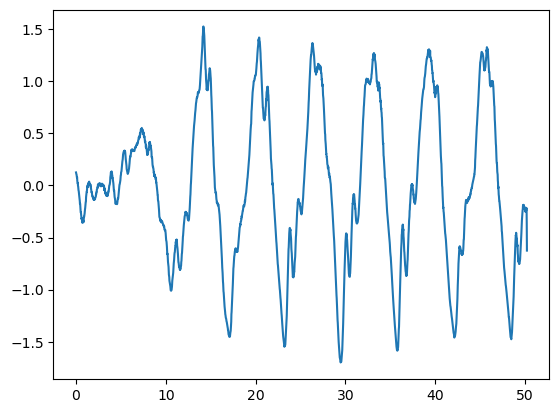

In [30]:
fig = plt.figure()
plt.plot(t, ax_pred)
plt.show()

In [42]:
vf = np.reshape(v[0],(1,3))
Rfuf = np.reshape(Rfu[0],(1,3))

acc_pred_first = model.predict(vf, Rfuf)
acc_pred_first[0][0]

0.12397903767771368

In [61]:
import torch.nn as nn




In [24]:
model2 = ps.SINDy(optimizer=stlsq_optimizer)
model2.fit(v, u=Rfu, t=dt)
model2.print()

(x0)' = -1.098 1 + -0.931 x0 + 3.244 x1 + 18.484 u0 + -0.871 x0 x1 + 1.633 x0 u2 + -10.505 x1 u2 + -3.355 x2 u0 + 0.499 x2 u2 + -40.843 u0^2 + 8.711 u0 u2
(x1)' = -4.785 u1 + 13.316 u1 u2
(x2)' = -7.660 1 + 2.949 x1 + 0.580 x2 + -1.721 u0 + 86.650 u1 + 7.423 u2 + -0.469 x0^2 + 7.972 x0 u0 + -0.651 x0 u2 + 2.834 x1 u2 + -2.799 x2 u0 + -1.107 x2 u2 + -164.005 u1 u2 + 20.099 u2^2


### Position Actual

In [25]:
features4 = ['p']
RawData4 = utils.load_data(dataset_folder)
Data4 = utils.format_data(RawData4, features=features4)

In [26]:
pos = np.zeros((2511,3),dtype = np.float64)
for row in range(len(pos)):
    for column in range(3):
        pos[row][column] = Data4[21][0][row][column]
pos.shape

(2511, 3)

In [27]:
pos

array([[-0.1459854 , -0.02481866,  2.12432257],
       [-0.1465864 , -0.02506804,  2.12421383],
       [-0.14733453, -0.02541521,  2.1241028 ],
       ...,
       [ 0.30095019,  0.00343549,  2.23770996],
       [ 0.28099194,  0.00368761,  2.26548276],
       [ 0.26271323,  0.00391967,  2.29081697]])

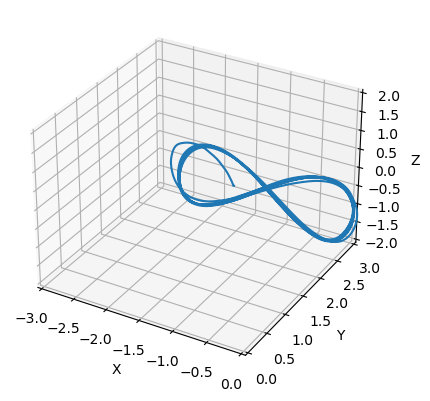

In [28]:


fig = plt.figure()
ax = plt.axes(projection='3d')

ax.set_xlim3d([-3, 0])
ax.set_ylim3d([0, 3])
ax.set_zlim3d([-2, 2])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.plot3D(pos[:,0],pos[:,1],pos[:,2])
plt.show()

### Position from learned position dynamics

#### 1st Model (v)

In [29]:
a = np.zeros((2511,3),dtype = np.float64)
for ele in range(2511):
    a[ele][0] = -1.868 -0.412*v[ele][0] +3.928*v[ele][1] +0.022*v[ele][2] +12.875*Rfu[ele][0] +5.148*Rfu[ele][1] +3.691*Rfu[ele][2] -0.269*v[ele][0]*v[ele][1] -1.415*v[ele][0]*Rfu[ele][0] +0.414*v[ele][0]*Rfu[ele][2] + 0.401*v[ele][1]*v[ele][2] -11.303*v[ele][1]*Rfu[ele][2] -1.529*v[ele][2]*Rfu[ele][0] + 0.317*v[ele][2]*Rfu[ele][2] -34.544*np.square(Rfu[ele][0]) + 24.774*Rfu[ele][0]*Rfu[ele][2] - 5.027*np.square(Rfu[ele][2])
    
for ele in range(2511):   
    a[ele][1] = -4.323*Rfu[ele][1] -0.540*v[ele][0]*v[ele][1] + 0.033*v[ele][0]*Rfu[ele][0] + 12.458*Rfu[ele][1]*Rfu[ele][2]
    
for ele in range(2511):
    a[ele][2] = -7.560 -0.495*v[ele][0] +4.504*v[ele][1] +0.624*v[ele][2] +94.041*Rfu[ele][1] +6.552*Rfu[ele][2] -0.464*np.square(v[ele][0]) + 7.494*v[ele][0]*Rfu[ele][0] +0.704*v[ele][0]*Rfu[ele][2] -0.172*v[ele][1]*v[ele][2] -0.597*v[ele][1]*Rfu[ele][2] -4.611*v[ele][2]*Rfu[ele][0] -1.024*v[ele][2]*Rfu[ele][2] -9.829*Rfu[ele][0]*Rfu[ele][2] -180.929*Rfu[ele][1]*Rfu[ele][2] + 22.222*np.square(Rfu[ele][2]) 

In [30]:
a.shape
t = np.linspace(0.0,50.2,2511)

In [31]:
t.shape

(2511,)

In [32]:
#rk4 integrator

def rk4(func, tk, yk, dt):
    
    f1 = func(tk, yk)
    f2 = func(tk + dt / 2, yk + (f1 * (dt / 2)))
    f3 = func(tk + dt / 2, yk + (f2 * (dt / 2)))
    f4 = func(tk + dt, yk + (f3 * dt))

    return yk + (dt / 6) * (f1 + (2 * f2) + (2 * f3) + f4)

In [33]:
def acc(tk,yk):
    count = tk/0.02
    return a[int(count)]

In [34]:
x = np.array([0,2,4,6,8])
ans =  np.zeros((5,1),dtype = np.float64)
state = 0
for ele in range(5):
    state = state + x[ele]*2
    ans[ele] = state


In [35]:
vel = np.zeros((2511,3),dtype = np.float64)
yk = v[0]
dt = 0.02
tk = 0
for ele in range(2510):
    ykplus1 = rk4(acc,tk,yk,dt)
    vel[ele] = ykplus1
    tk = tk+0.02
    yk = ykplus1 

In [36]:
def velocity(tk,yk):
    count = tk/0.02
    return vel[int(count)]

In [37]:
pos_sindy = np.zeros((2511,3),dtype = np.float64)
xk = pos[0]
dt = 0.02
tk = 0
for ele in range(2510):
    ykplus1 = rk4(velocity,tk,yk,dt)
    pos_sindy[ele] = ykplus1
    tk = tk+0.02
    yk = ykplus1

In [38]:
pos_sindy

array([[ -1.00850022,   0.59860575,   1.52037831],
       [ -1.00932564,   0.59827607,   1.51993655],
       [ -1.01012199,   0.59794848,   1.51960287],
       ...,
       [ -9.80440292,  14.88125494, -22.45088195],
       [ -9.821197  ,  14.89123723, -22.4255331 ],
       [  0.        ,   0.        ,   0.        ]])

In [39]:
pos_sindy_dp = np.zeros((2509,3),dtype = np.float64)
for ele in range(2509):
    pos_sindy_dp[ele] = pos_sindy[ele]

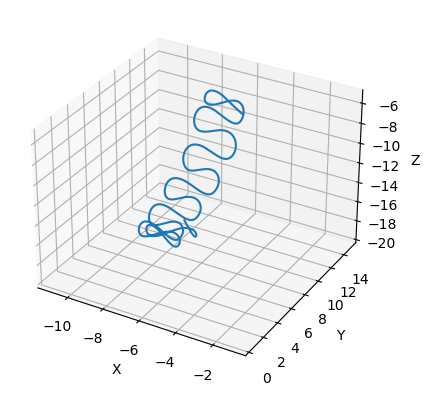

In [40]:


fig = plt.figure()
ax = plt.axes(projection='3d')

ax.set_zlim3d([-20, -5])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.plot3D(pos_sindy_dp[:,0],pos_sindy_dp[:,1],pos_sindy_dp[:,2])
plt.show()

In [41]:
#mse
#errorx = 0.0
#for ele in range(2509):
#    temp = np.square(np.subtract(pos_sindy_dp[ele,0],posx[ele]))
#    errorx = errorx + temp
#errorx = errorx/2509
#errorx

#### 2nd Model (v)

In [42]:
ac = np.zeros((2511,3),dtype = np.float64)
for ele in range(2511):
    ac[ele][0] = -0.361*np.exp(v[ele][1]) +  2334.579*np.exp(Rfu[ele][0]) -5.108*np.exp(Rfu[ele][2]) -0.568*np.square(v[ele][0]) -183.055*np.square(Rfu[ele][0]) + 1.202*v[ele][0] -4616.089*Rfu[ele][0] + 1.286*np.exp(-v[ele][0])  -2313.625*np.exp(-Rfu[ele][0]) -6.928*np.exp(-Rfu[ele][1]) -13.122*np.exp(-Rfu[ele][2])

for ele in range(2511):
    ac[ele][1] =  -3468.045 *np.exp(Rfu[ele][1]) + 6950.307 *Rfu[ele][1] + 3467.931 *np.exp(-Rfu[ele][1])
    
for ele in range(2511):
    ac[ele][2] =  0.816 *np.exp(v[ele][0]) + 16.424 *np.exp(v[ele][1]) + -0.550 *np.exp(v[ele][2]) + -98.640 *np.exp(Rfu[ele][0]) + 1623454.929 *np.exp(Rfu[ele][1]) + 9158.806 *np.exp(Rfu[ele][2]) + -1.748*np.square(v[ele][0]) + 0.963*np.square(v[ele][2]) + -14788.206*np.square(Rfu[ele][2]) + 0.369 *v[ele][0] + -0.293 *v[ele][2] + -3279626.558 *Rfu[ele][1] + 14240.409 *Rfu[ele][2] + 1.060 *np.exp(-v[ele][0]) + 16.134 *np.exp(-v[ele][1]) + -0.806 *np.exp(-v[ele][2]) + -110.898 *np.exp(-Rfu[ele][0]) + -1656325.182 *np.exp(-Rfu[ele][1]) + 23945.478 *np.exp(-Rfu[ele][2])

In [43]:
def acc2(tk,yk):
    count = tk/0.02
    return ac[int(count)]

In [44]:
vel2 = np.zeros((2511,3),dtype = np.float64)
yk = v[0]
dt = 0.02
tk = 0
velx = v[0][0]
for ele in range(2511):
    
    velx = velx + ac[ele][0]*dt
    vel2[ele][0] = velx
vely = v[0][1]
for ele in range(2511):
    vely = vely + ac[ele][1]*dt
    vel2[ele][1] = vely
    
velz = v[0][2]
for ele in range(2511):
    velz = velz + ac[ele][2]*dt
    vel2[ele][2] = velz
    
vel2

array([[-0.04446264, -0.01812099, -0.02564164],
       [-0.04425102, -0.01954066, -0.01738078],
       [-0.04413556, -0.02084593, -0.0085827 ],
       ...,
       [-1.03688951,  0.03322461,  1.53720057],
       [-1.04467857,  0.03265203,  1.48714744],
       [-1.06218987,  0.0314831 ,  1.44726252]])

In [45]:
def velocity2(tk,yk):
    count = tk/0.02
    return vel2[int(count)]

In [46]:
pos_sindy2 = np.zeros((2511,3),dtype = np.float64)
posx = pos[0][0]
posy = pos[0][1]
posz = pos[0][2]

for ele in range(2511):
    posx = posx + vel2[ele][0]*dt
    pos_sindy2[ele][0] = posx

for ele in range(2511):
    posy = posy + vel2[ele][1]*dt
    pos_sindy2[ele][1] = posy
    
for ele in range(2511):
    posz = posz + vel2[ele][2]*dt
    pos_sindy2[ele][2] = posz
    
pos_sindy2

array([[ -0.14687465,  -0.02518108,   2.12380974],
       [ -0.14775967,  -0.02557189,   2.12346212],
       [ -0.14864238,  -0.02598881,   2.12329047],
       ...,
       [-12.84445665,  -1.56649652, -20.68935989],
       [-12.86535022,  -1.56584348, -20.65961694],
       [-12.88659402,  -1.56521381, -20.63067169]])

In [47]:
pos_sindy2_dp = np.zeros((2509,3),dtype = np.float64)
for ele in range(2509):
    pos_sindy2_dp[ele] = pos_sindy2[ele]

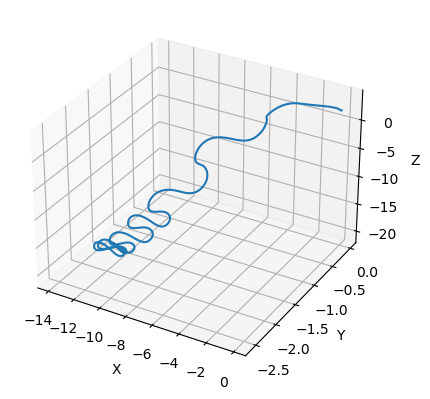

In [48]:
fig = plt.figure()
ax = plt.axes(projection='3d')


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')



ax.plot3D(pos_sindy2[:,0],pos_sindy2[:,1],pos_sindy2[:,2])
plt.show()

In [49]:
pos_sindy

array([[ -1.00850022,   0.59860575,   1.52037831],
       [ -1.00932564,   0.59827607,   1.51993655],
       [ -1.01012199,   0.59794848,   1.51960287],
       ...,
       [ -9.80440292,  14.88125494, -22.45088195],
       [ -9.821197  ,  14.89123723, -22.4255331 ],
       [  0.        ,   0.        ,   0.        ]])

In [50]:
pos[0]

array([-0.1459854 , -0.02481866,  2.12432257])

In [51]:
pos_sindy2

array([[ -0.14687465,  -0.02518108,   2.12380974],
       [ -0.14775967,  -0.02557189,   2.12346212],
       [ -0.14864238,  -0.02598881,   2.12329047],
       ...,
       [-12.84445665,  -1.56649652, -20.68935989],
       [-12.86535022,  -1.56584348, -20.65961694],
       [-12.88659402,  -1.56521381, -20.63067169]])

#### 3rd Model(v)

In [52]:
acc = np.zeros((2511,3),dtype = np.float64)
for ele in range(2511):
    acc[ele][0] = -0.107 *np.exp(v[ele][0]) + 10330844.367 *np.exp(v[ele][1]) + -0.041 *np.exp(v[ele][2]) + 1175330.567 *np.exp(Rfu[ele][0]) + 0.052 *np.square(v[ele][2]) + 2193.029 *np.square(Rfu[ele][0]) + 0.412 *v[ele][0] + -41331958.016 *v[ele][1] + 0.225 *v[ele][2] + -4717779.253 *Rfu[ele][0] + -299086.889 *Rfu[ele][1] + -10330781.926 *np.exp(-v[ele][1]) + -0.046 *np.exp(-v[ele][2]) + -1179510.913 *np.exp(-Rfu[ele][0]) + 4116.981 *np.exp(-Rfu[ele][1]) + 3.874 *v[ele][0]*v[ele][1] + -0.071 *v[ele][0]*v[ele][2] + 1.074 *v[ele][0]*Rfu[ele][2] + -0.669 *v[ele][1]*v[ele][2] + -4.559 *v[ele][1]*Rfu[ele][2] + -4.436 *v[ele][2]*Rfu[ele][0] + -0.137 *v[ele][2]*Rfu[ele][2] + 4.223 *Rfu[ele][0]*Rfu[ele][2] + -7.735 *v[ele][0]*v[ele][1]*Rfu[ele][2] + -0.107 *v[ele][0]*v[ele][2]*Rfu[ele][2] + -2.377 *v[ele][0]*Rfu[ele][0]*Rfu[ele][2] + 1.206 *v[ele][1]*v[ele][2]*Rfu[ele][2] + 6.837 *v[ele][2]*Rfu[ele][0]*Rfu[ele][2] + -1.060 *np.sin(v[ele][0]) + 20670333.055 *np.sin(v[ele][1]) + 2362955.683 *np.sin(Rfu[ele][0]) + 303185.728 *np.sin(Rfu[ele][1])

for ele in range(2511):
    acc[ele][1] =  0.819 *np.exp(v[ele][1]) + -0.167 *np.exp(v[ele][2]) + 629562801.474 *np.exp(Rfu[ele][1]) + 0.178 *np.square(v[ele][2]) + -2518288196.059 *Rfu[ele][1] + -0.152 *np.exp(-v[ele][2]) + -629562802.108 *np.exp(-Rfu[ele][1]) + 0.091 *v[ele][0]*v[ele][2] + 4.147 *v[ele][0]*Rfu[ele][0] + 3.295 *v[ele][0]*Rfu[ele][1] + 0.410 *v[ele][0]*Rfu[ele][2] + -0.699 *v[ele][2]*Rfu[ele][0] + -25.781 *Rfu[ele][1]*Rfu[ele][2] + 0.975 *v[ele][0]*v[ele][2]*Rfu[ele][1] + -0.256 *v[ele][0]*v[ele][2]*Rfu[ele][2] + -7.556 *v[ele][0]*Rfu[ele][0]*Rfu[ele][2] + 2.035 *v[ele][2]*Rfu[ele][0]*Rfu[ele][2] + -0.288 *np.sin(v[ele][0]) + 1259162622.031 *np.sin(Rfu[ele][1])
    
for ele in range(2511):
    acc[ele][2] = 0.377 *np.exp(v[ele][0]) + -43369058.754 *np.exp(v[ele][1]) + -0.589 *np.exp(v[ele][2]) + 3999766.687 *np.exp(Rfu[ele][0]) + 3698668216.989 *np.exp(Rfu[ele][1]) + 15403.260 *np.exp(Rfu[ele][2]) + -1.880 *np.square(v[ele][0]) + 1.086 *np.square(v[ele][2]) + 5566.307 *np.square(Rfu[ele][2]) + 173510029.572 *v[ele][1] + -16026123.757 *Rfu[ele][0] + -14795731063.275 *Rfu[ele][1] + -85520.679 *Rfu[ele][2] + 2.101 *np.exp(-v[ele][0]) + 43368985.478 *np.exp(-v[ele][1]) + -1.144 *np.exp(-v[ele][2]) + -3999046.142 *np.exp(-Rfu[ele][0]) + -3698659984.687 *np.exp(-Rfu[ele][1]) + -24232.069 *np.exp(-Rfu[ele][2]) + -2.992 *v[ele][0]*v[ele][1] + 0.490 *v[ele][0]*v[ele][2] + 37.700 *v[ele][0]*Rfu[ele][0] + 3.160 *v[ele][0]*Rfu[ele][2] + 1.115 *v[ele][1]*v[ele][2] + 3.740 *v[ele][1]*Rfu[ele][2] + -27.398 *v[ele][2]*Rfu[ele][0] + -1.183 *v[ele][2]*Rfu[ele][2] + -17.649 *Rfu[ele][1]*Rfu[ele][2] + 1.542 *v[ele][0]*v[ele][1]*v[ele][2] + -1.328 *v[ele][0]*v[ele][2]*Rfu[ele][0] + -0.521 *v[ele][0]*v[ele][2]*Rfu[ele][2] + -54.181 *v[ele][0]*Rfu[ele][0]*Rfu[ele][2] + 45.381 *v[ele][2]*Rfu[ele][0]*Rfu[ele][2] + 0.061 *np.sin(v[ele][0]) + -86771987.970 *np.sin(v[ele][1]) + 8027302.107 *np.sin(Rfu[ele][0]) + 7398402851.017 *np.sin(Rfu[ele][1]) + 45453.307 *np.sin(Rfu[ele][2])
    

In [53]:
def acc3(tk,yk):
    count = tk/0.02
    return acc[int(count)]

In [54]:
vel3 = np.zeros((2511,3),dtype = np.float64)
yk = v[0]
dt = 0.02
tk = 0
for ele in range(2510):
    ykplus1 = rk4(acc3,tk,yk,dt)
    vel3[ele] = ykplus1
    tk = tk+0.02
    yk = ykplus1 

In [55]:
def velocity3(tk,yk):
    count = tk/0.02
    return vel3[int(count)]

In [56]:
pos_sindy3 = np.zeros((2511,3),dtype = np.float64)
xk = pos[0]
dt = 0.02
tk = 0
for ele in range(2510):
    ykplus1 = rk4(velocity3,tk,yk,dt)
    pos_sindy3[ele] = ykplus1
    tk = tk+0.02
    yk = ykplus1

In [57]:
pos_sindy3_dp = np.zeros((2509,3),dtype = np.float64)
for ele in range(2509):
    pos_sindy3_dp[ele] = pos_sindy3[ele]

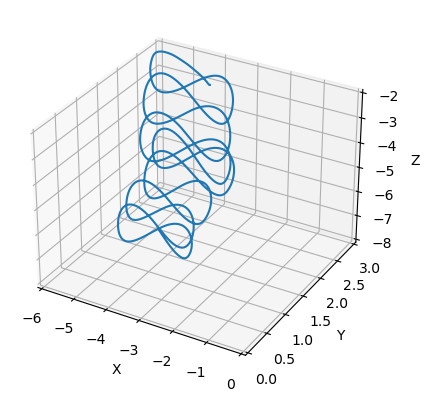

In [58]:
fig = plt.figure()
ax = plt.axes(projection='3d')


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_xlim3d([-6, 0])
ax.set_ylim3d([0, 3])
ax.set_zlim3d([-8, -2])

ax.plot3D(pos_sindy3_dp[:,0],pos_sindy3_dp[:,1],pos_sindy3_dp[:,2])
plt.show()

In [59]:
pos_sindy3

array([[-1.01571821,  0.01977102,  1.4989019 ],
       [-1.01651879,  0.01935799,  1.49854788],
       [-1.01727923,  0.0189106 ,  1.49834058],
       ...,
       [-4.97852685,  2.06199009, -8.22516385],
       [-4.99544147,  2.0623259 , -8.20017373],
       [ 0.        ,  0.        ,  0.        ]])

In [60]:
accc = np.zeros((2511,3),dtype = np.float64)
for ele in range(2511):
    accc[ele][0] =  -1.363 *np.exp(v[ele][1]) + 1133520.090 *np.exp(Rfu[ele][0]) + -4537970.332 *Rfu[ele][0] + -1133520.021 *np.exp(-Rfu[ele][0]) + 0.304 *v[ele][0]*v[ele][2] + 11.476 *v[ele][0]*Rfu[ele][2] + 11.381 *v[ele][2]*Rfu[ele][0] + -9227.493 *Rfu[ele][0]*Rfu[ele][2] + -1.224 *v[ele][0]*v[ele][2]*Rfu[ele][2] + -0.558 *np.sin(v[ele][0]) + 2270953.246 *np.sin(Rfu[ele][0]) + 0.684 *np.square(v[ele][2])*(Rfu[ele][0]) + -0.102 *np.square(v[ele][2])*(Rfu[ele][2]) + -11.090 *np.sin(v[ele][0]*Rfu[ele][2]) + -10.542 *np.sin(v[ele][2]*Rfu[ele][0]) + 9234.970 *np.sin(Rfu[ele][0]*Rfu[ele][2])
    
for ele in range(2511):
    accc[ele][1] =  844858802.897 *np.exp(Rfu[ele][1]) + -3379519397.958 *(Rfu[ele][1]) + -844858803.019 *np.exp(-Rfu[ele][1]) + 1689801808.118 *np.sin(Rfu[ele][1])
    
for ele in range(2511):
    accc[ele][2] = -2.883 *np.exp(v[ele][0]) + -42383689.931 *np.exp(v[ele][1]) + -0.432 *np.exp(v[ele][2]) + -10.067 *np.exp(Rfu[ele][0]) + 5890321403.760 *np.exp(Rfu[ele][1]) + 13562.033 *np.exp(Rfu[ele][2]) + 1.037 *np.square(v[ele][2]) + 5244.512 *np.square(Rfu[ele][2]) + 169568661.197 *v[ele][1] + -23561062741.635 *Rfu[ele][1] + -76633.034 *Rfu[ele][2] + -0.299 *np.exp(-v[ele][0]) + 42383664.101 *np.exp(-v[ele][1]) + -1.210 *np.exp(-v[ele][2]) + -6.077 *np.exp(-Rfu[ele][0]) + -5890312981.128 *np.exp(-Rfu[ele][1]) + -21886.802 *np.exp(-Rfu[ele][2]) + 1.348 *v[ele][0]*v[ele][2] + 3400.823 *v[ele][0]*Rfu[ele][0] + 14.639 *v[ele][0]*Rfu[ele][2] + -390.511 *v[ele][2]*Rfu[ele][0] + -1.752 *v[ele][2]*Rfu[ele][2] + -10373033.476 *Rfu[ele][1]*Rfu[ele][2] + -4.399 *v[ele][0]*v[ele][2]*Rfu[ele][0] + -1.822 *v[ele][0]*v[ele][2]*Rfu[ele][2] + -97.992 *v[ele][0]*Rfu[ele][0]*Rfu[ele][2] + 26.493 *v[ele][2]*Rfu[ele][0]*Rfu[ele][2] + -84801308.364 *np.sin(v[ele][1]) + 11780428205.023 *np.sin(Rfu[ele][1]) + 40769.212 *np.sin(Rfu[ele][2]) + -4.367 *np.square(v[ele][0])*(Rfu[ele][0]) + 3.456 *np.square(v[ele][0])*(Rfu[ele][2]) + -1.446 *np.square(v[ele][2])*(Rfu[ele][0]) + -3350.113 *np.sin(v[ele][0]*Rfu[ele][0]) + -8.950 *np.sin(v[ele][0]*Rfu[ele][2]) + 373.041 *np.sin(v[ele][2]*Rfu[ele][0]) + 10373295.091 *np.sin(Rfu[ele][1]*Rfu[ele][2])

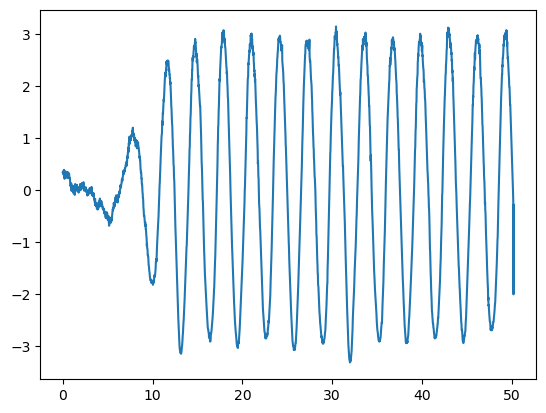

In [61]:
fig = plt.figure()
plt.plot(t, accc[:,2])
plt.show()

In [62]:
#mse
#errorx = 0.0
#for ele in range(2511):
#    temp = np.square(np.subtract(accc[ele][0],accx[ele]))
#    errorx = errorx + temp
#errorx = errorx/2511
#print(errorx)

#errory = 0.0
#for ele in range(2511):
#    temp = np.square(np.subtract(accc[ele][1],accy[ele]))
#    errory = errory + temp
#errory = errory/2511
#print(errory)
#
#errorz= 0.0
#for ele in range(2511):
#    temp = np.square(np.subtract(accc[ele][2],accz[ele]))
#    errorz= errorz+ temp
#errorz= errorz/2511
#print(errorz)

#### 4th Model (v)

In [63]:
def acc4(tk,yk):
    count = tk/0.02
    return accc[int(count)]

In [64]:
vel4 = np.zeros((2511,3),dtype = np.float64)
yk = v[0]
dt = 0.02
tk = 0
for ele in range(2510):
    ykplus1 = rk4(acc4,tk,yk,dt)
    vel4[ele] = ykplus1
    tk = tk+0.02
    yk = ykplus1 

In [65]:
def velocity4(tk,yk):
    count = tk/0.02
    return vel4[int(count)]

In [66]:
pos_sindy4 = np.zeros((2511,3),dtype = np.float64)
xk = pos[0]
dt = 0.02
tk = 0
for ele in range(2510):
    ykplus1 = rk4(velocity4,tk,yk,dt)
    pos_sindy4[ele] = ykplus1
    tk = tk+0.02
    yk = ykplus1

In [67]:
#mse
errorx = 0.0
for ele in range(2510):
    temp = np.square(np.subtract(pos_sindy4[ele][0],posx[ele]))
    errorx = errorx + temp
errorx = errorx/2510
print(errorx)

errory = 0.0
for ele in range(2510):
    temp = np.square(np.subtract(pos_sindy4[ele][1],posy[ele]))
    errory = errory + temp
errory = errory/2510
print(errory)

errorz= 0.0
for ele in range(2510):
    temp = np.square(np.subtract(pos_sindy4[ele][2],posz[ele]))
    errorz= errorz+ temp
errorz= errorz/2510
print(errorz)

IndexError: invalid index to scalar variable.

In [68]:
pos_sindy4_dp = np.zeros((2509,3),dtype = np.float64)
for ele in range(2509):
    pos_sindy4_dp[ele] = pos_sindy4[ele]

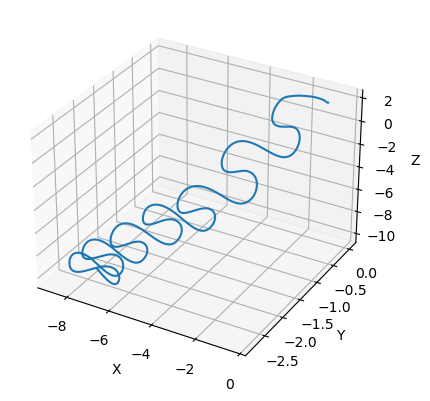

In [69]:
fig = plt.figure()
ax = plt.axes(projection='3d')


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')



ax.plot3D(pos_sindy4_dp[:,0],pos_sindy4_dp[:,1],pos_sindy4_dp[:,2])
plt.show()

In [70]:
pos_sindy4_dp

array([[-9.88671196e-01,  2.43443495e-03,  1.50355095e+00],
       [-9.89465689e-01,  2.03711413e-03,  1.50316558e+00],
       [-9.90217914e-01,  1.61316243e-03,  1.50291172e+00],
       ...,
       [-7.50544663e+00, -2.49186807e+00, -9.70850145e+00],
       [-7.52495786e+00, -2.49179569e+00, -9.67754606e+00],
       [-7.54457783e+00, -2.49172830e+00, -9.64689163e+00]])

In [71]:
pos_sindy4

array([[-9.88671196e-01,  2.43443495e-03,  1.50355095e+00],
       [-9.89465689e-01,  2.03711413e-03,  1.50316558e+00],
       [-9.90217914e-01,  1.61316243e-03,  1.50291172e+00],
       ...,
       [-7.54457783e+00, -2.49172830e+00, -9.64689163e+00],
       [-7.56104170e+00, -2.49168158e+00, -9.62182375e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

#### 5th Model (v)

In [72]:
dt = 0.02
stlsq_optimizer = ps.STLSQ(threshold=.1, alpha=.5)

library_functions = [
    lambda x : np.exp(x),
    lambda x : np.square(x),
    lambda x : x,
    lambda x : np.exp(-x),
    lambda x,y : x*y,
    lambda x,y,z : x*y*z,
    lambda x : np.sin(x),
    lambda x,y : np.square(x)*y,
    lambda x,y : np.sin(x*y),
    lambda x,y : x*np.sin(y)
]
library_function_names = [
    lambda x : 'exp(' + x + ')',
    lambda x : x + '^2',
    lambda x : x,
    lambda x : 'exp(' + '-' + x + ')',
    lambda x,y : x+y,
    lambda x,y,z : x+y+z,
    lambda x : 'sin' + x,
    lambda x,y : x + '^2' + y,
    lambda x,y : 'sin' + x + y,
    lambda x,y : x + 'sin' + y
]
custom_library = ps.CustomLibrary(
    library_functions=library_functions, function_names=library_function_names
)

model = ps.SINDy(feature_library=custom_library, optimizer=stlsq_optimizer)
model.fit(v, u=Rfu, t=dt)
model.print()

(x0)' = 3.260 exp(x0) + 2839461.356 exp(x1) + 2109527.063 exp(u0) + -0.152 x2^2 + 415.389 u0^2 + -12.476 x0 + -11364106.495 x1 + -8453741.279 u0 + -3.518 exp(-x0) + -2839380.768 exp(-x1) + 0.084 exp(-x2) + -2109602.960 exp(-u0) + -5.663 exp(-u1) + -3742.756 x0x1 + -0.687 x0x2 + 25.856 x0u2 + 38148.691 x1u2 + 1047.156 x2u0 + 4996.576 u0u2 + 1.479 x0x2u2 + -0.286 x0u0u2 + -13.607 x2u0u2 + 6.082 sinx0 + 5685257.178 sinx1 + 4234638.223 sinu0 + 1.267 x0^2x1 + -0.526 x0^2u0 + -0.012 x2^2u0 + 0.292 x2^2u2 + -334.577 u0^2u2 + 14826.135 sinx0x1 + -0.028 sinx0x2 + 14.882 sinx0u2 + -38375.875 sinx1u2 + -125.794 sinx2u0 + 0.929 sinx2u2 + -4506.340 sinu0u2 + -11083.281 x0sinx1 + -43.572 x0sinu2 + 248.224 x1sinu2 + -919.099 x2sinu0 + -533.093 u0sinu2
(x1)' = -0.138 exp(x2) + -2209972886.470 exp(u1) + 8839636545.848 u1 + -0.137 exp(-x2) + 0.580 exp(-u0) + 2209972886.103 exp(-u1) + 0.047 x0x2 + -7.179 x0u2 + 3307295.996 u1u2 + -0.197 x0x2u2 + -0.467 sinx0 + -4419690805.142 sinu1 + -0.091 x0^2u0 + 2.86

In [73]:
accel = np.zeros((2511,3),dtype = np.float64)
for ele in range(2511):
    accel[ele][0] = 3.260 *np.exp(v[ele][0]) + 2839461.356 *np.exp(v[ele][1]) + 2109527.063 *np.exp(Rfu[ele][0]) + -0.152 *np.square(v[ele][2]) + 415.389 *np.square(Rfu[ele][0]) + -12.476 *v[ele][0] + -11364106.495 *v[ele][1] + -8453741.279 *Rfu[ele][0] + -3.518 *np.exp(-v[ele][0]) + -2839380.768 *np.exp(-v[ele][1]) + 0.084 *np.exp(-v[ele][2]) + -2109602.960 *np.exp(-Rfu[ele][0]) + -5.663 *np.exp(-Rfu[ele][1]) + -3742.756 *v[ele][0]*v[ele][1] + -0.687 *v[ele][2]*v[ele][0] + 25.856 *v[ele][0]*Rfu[ele][2] + 38148.691 *v[ele][1]*Rfu[ele][2] + 1047.156 *v[ele][2]*Rfu[ele][0] + 4996.576 *Rfu[ele][0]*Rfu[ele][2] + 1.479 *v[ele][2]*v[ele][0]*Rfu[ele][2] + -0.286 *v[ele][0]*Rfu[ele][0]*Rfu[ele][2] + -13.607 *v[ele][2]*Rfu[ele][0]*Rfu[ele][2] + 6.082 *np.sin(v[ele][0]) + 5685257.178 *np.sin(v[ele][1]) + 4234638.223 *np.sin(Rfu[ele][0]) + 1.267 *np.square(v[ele][0])*v[ele][1] + -334.577 *np.square(Rfu[ele][0])*Rfu[ele][2] + 14826.135 *np.sin(v[ele][0]*v[ele][1]) + -0.028 *np.sin(v[ele][0]*v[ele][2]) + 14.882 *np.sin(v[ele][0]*Rfu[ele][2]) + -38375.875 *np.sin(v[ele][1]*Rfu[ele][2]) + -125.794 *np.sin(v[ele][2]*Rfu[ele][0]) + 0.929 *np.sin(v[ele][2]*Rfu[ele][2]) + -4506.340 *np.sin(Rfu[ele][0]*Rfu[ele][2]) + -11083.281 *v[ele][0]*np.sin(v[ele][1]) + -43.572 *v[ele][0]*np.sin(Rfu[ele][2]) + 248.224 *v[ele][1]*np.sin(Rfu[ele][2]) + -919.099 *v[ele][2]*np.sin(Rfu[ele][0]) + -533.093 *Rfu[ele][0]*np.sin(Rfu[ele][2])
    
for ele in range(2511):
    accel[ele][1] = -0.138 *np.exp(v[ele][2]) + -2209972886.470 *np.exp(Rfu[ele][1]) + 8839636545.848 *Rfu[ele][1] + 2209972886.103 *np.exp(-Rfu[ele][1]) + -7.179 *v[ele][0]*Rfu[ele][2]  + 3307295.996 *(Rfu[ele][1]*Rfu[ele][2])  + -4419690805.142 *np.sin(Rfu[ele][1]) + 2.863 *np.square(v[ele][0])*Rfu[ele][1] + 2.047 *np.square(v[ele][2])*Rfu[ele][1]   + -3309263.717 *np.sin(Rfu[ele][1]*Rfu[ele][2])  + 8.431 *v[ele][0]*np.sin(Rfu[ele][2]) + 2139.416 *Rfu[ele][1]*np.sin(Rfu[ele][2])
    
for ele in range(2511):
    accel[ele][2] =  -42891117.028 *np.exp(v[ele][1])  + 2277716.489 *np.exp(Rfu[ele][0]) + 12234244456.722 *np.exp(Rfu[ele][1]) + -18362.343 *np.exp(Rfu[ele][2]) +  -1165.037 *np.square(Rfu[ele][2]) + 171614817.103 *v[ele][1] + -9109710.724 *Rfu[ele][0] + -48935911543.739 *Rfu[ele][1] + 81381.775 *Rfu[ele][2] + 42891120.186 *np.exp(-v[ele][1])  + -2277729.870 *np.exp(-Rfu[ele][0]) + -12234245378.202 *np.exp(-Rfu[ele][1]) + 19279.372 *np.exp(-Rfu[ele][2]) + 7616.153 *v[ele][0]*v[ele][1] + 6575.099 *v[ele][0]*Rfu[ele][0] + -55.826 *v[ele][0]*Rfu[ele][2] + 1451.256 *v[ele][1]*v[ele][2] + -140790.471 *v[ele][1]*Rfu[ele][2] + 1044.269 *v[ele][2]*Rfu[ele][0] + 115.115 *v[ele][2]*Rfu[ele][2] + -81082.669 *Rfu[ele][0]*Rfu[ele][2] + -14752733.771 *Rfu[ele][1]*Rfu[ele][2]  + -15.262 *v[ele][2]*v[ele][0]*Rfu[ele][0] + 19.587 *v[ele][0]*Rfu[ele][0]*Rfu[ele][2] + -56.039 *v[ele][2]*Rfu[ele][0]*Rfu[ele][2]  + -85832584.469 *np.sin(v[ele][1]) + 4554307.973 *np.sin(Rfu[ele][0]) + 24467421797.965 *np.sin(Rfu[ele][1]) + -43553.593 *np.sin(Rfu[ele][2])  + 39365.543 *np.sin(v[ele][0]*v[ele][1])  + -5584.351 *np.sin(v[ele][0]*Rfu[ele][0]) + -1457.792 *np.sin(v[ele][2]*v[ele][1]) + 140801.901 *np.sin(v[ele][1]*Rfu[ele][2]) + 305.705 *np.sin(v[ele][2]*Rfu[ele][0])  + 82637.921 *np.sin(Rfu[ele][0]*Rfu[ele][2]) + 14757125.919 *np.sin(Rfu[ele][1]*Rfu[ele][2]) + -46986.530 *(v[ele][0])*np.sin(v[ele][1]) + -996.412 *v[ele][0]*np.sin(Rfu[ele][0]) + 56.547 *v[ele][0]*np.sin(Rfu[ele][2]) + 11.546 *v[ele][1]*np.sin(v[ele][2]) + -1337.649 *v[ele][2]*np.sin(Rfu[ele][0]) + -127.800 *v[ele][2]*np.sin(Rfu[ele][2]) + -1706.156 *Rfu[ele][0]*np.sin(Rfu[ele][2]) + -4684.797 *Rfu[ele][1]*np.sin(Rfu[ele][2])

In [74]:
def acc5(tk,yk):
    count = tk/0.02
    return accel[int(count)]

In [75]:
vel5 = np.zeros((2511,3),dtype = np.float64)
yk = v[0]
dt = 0.02
tk = 0
for ele in range(2510):
    ykplus1 = rk4(acc5,tk,yk,dt)
    vel5[ele] = ykplus1
    tk = tk+0.02
    yk = ykplus1 

In [76]:
def velocity5(tk,yk):
    count = tk/0.02
    return vel5[int(count)]

In [77]:
pos_sindy5 = np.zeros((2511,3),dtype = np.float64)
xk = pos[0]
dt = 0.02
tk = 0
for ele in range(2510):
    ykplus1 = rk4(velocity5,tk,yk,dt)
    pos_sindy5[ele] = ykplus1
    tk = tk+0.02
    yk = ykplus1

In [78]:
pos_sindy5_dp = np.zeros((2509,3),dtype = np.float64)
for ele in range(2509):
    pos_sindy5_dp[ele] = pos_sindy5[ele]

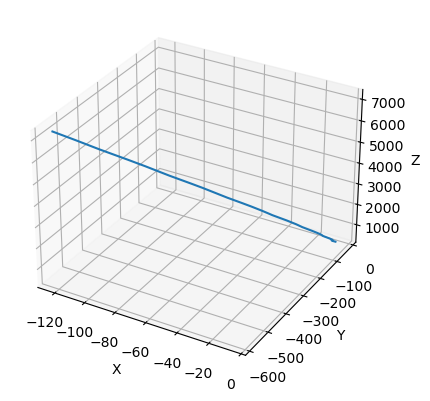

In [79]:
fig = plt.figure()
ax = plt.axes(projection='3d')


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')



ax.plot3D(pos_sindy5_dp[:,0],pos_sindy5_dp[:,1],pos_sindy5_dp[:,2])
plt.show()

In [80]:
pos_sindy5_dp


array([[-6.43929265e+00, -2.29035151e+01,  2.82878707e+02],
       [-6.44010022e+00, -2.29042658e+01,  2.82883080e+02],
       [-6.44086829e+00, -2.29052066e+01,  2.82889774e+02],
       ...,
       [-1.22641078e+02, -5.79672756e+02,  7.29778629e+03],
       [-1.22769532e+02, -5.80129898e+02,  7.30344406e+03],
       [-1.22898157e+02, -5.80587543e+02,  7.30910191e+03]])

#### 6th Model(v)

In [81]:
dt = 0.02
stlsq_optimizer = ps.STLSQ(threshold=.2, alpha=.3)

library_functions = [
    lambda x : np.square(x),
    lambda x : x,
    lambda x : x*x*x,
    lambda x,y : x*y,
    lambda x,y,z : x*y*z,
    lambda x : np.sin(x),
    lambda x,y : np.sin(x*y),
    lambda x,y : x*np.sin(y)
]
library_function_names = [
    lambda x : '*' + 'np.square' + '(' + x + ')',
    lambda x : '*' + x,
    lambda x : '*' + 'np.power' + '(' + x + ',' + '3' + ')',
    lambda x,y : '*' + x + '*' + y,
    lambda x,y,z : '*' + x + '*' + y + '*' + z,
    lambda x : '*' + 'np.sin' +'(' + x + ')',
    lambda x,y : '*' + 'np.sin' + '(' + x + '*' + y + ')' ,
    lambda x,y : '*' + x + '*' + 'np.sin' +'(' + y + ')'
]
custom_library = ps.CustomLibrary(
    library_functions=library_functions, function_names=library_function_names
)

model = ps.SINDy(feature_library=custom_library, optimizer=stlsq_optimizer)
model.fit(v, u=Rfu, t=dt)
model.print()

(x0)' = 49.507 *np.square(u0) + 55.336 *np.square(u2) + 1.948 *x0 + -2902.530 *x1 + -1773.102 *u0 + -245.832 *u2 + -11.656 *np.power(u2,3) + -0.674 *x0*x2 + 4780.907 *x0*u0 + -4.640 *x0*u2 + -122.799 *x2*u0 + -0.803 *x2*u2 + -3130.338 *u0*u2 + -1.265 *x0*x2*u0 + 1.432 *x0*x2*u2 + -5.985 *x0*u0*u2 + -4.118 *x2*u0*u2 + -2.733 *np.sin(x0) + 2901.262 *np.sin(x1) + 1826.320 *np.sin(u0) + 228.805 *np.sin(u2) + -1494.530 *np.sin(x0*u0) + 22.757 *np.sin(x0*u2) + -286.919 *np.sin(x2*u0) + 1.583 *np.sin(x2*u2) + 3771.701 *np.sin(u0*u2) + -3293.578 *x0*np.sin(u0) + -16.616 *x0*np.sin(u2) + 407.282 *x2*np.sin(u0) + -748.353 *u0*np.sin(u2)
(x1)' = 782615.405 *u1 + -3375404.572 *u1*u2 + -782614.189 *np.sin(u1) + 3375912.033 *np.sin(u1*u2) + -541.446 *u1*np.sin(u2)
(x2)' = -0.816 *np.square(x0) + -85.806 *np.square(u2) + 2.241 *x2 + -6856.515 *u0 + 24535.395 *u2 + -3859.971 *np.power(u2,3) + 0.373 *x0*x2 + 6358.408 *x0*u0 + -50.224 *x0*u2 + 985.499 *x1*x2 + 111750.428 *x1*u2 + -6704.749 *x2*u0 + -301

In [82]:
accel2 = np.zeros((2511,3),dtype = np.float64)
for ele in range(2511):
    accel2[ele][0] = 49.507 *np.square(Rfu[ele][0]) + 55.336 *np.square(Rfu[ele][2]) + 1.948 *v[ele][0] + -2902.530 *v[ele][1] + -1773.102 *Rfu[ele][0] + -245.832 *Rfu[ele][2] + -11.656 *np.power(Rfu[ele][2],3) + -0.674 *v[ele][2]*v[ele][0] + 4780.907 *v[ele][0]*Rfu[ele][0] + -4.640 *v[ele][0]*Rfu[ele][2] + -122.799 *v[ele][2]*Rfu[ele][0] + -0.803 *v[ele][2]*Rfu[ele][2] + -3130.338 *Rfu[ele][0]*Rfu[ele][2] + -1.265 *v[ele][2]*v[ele][0]*Rfu[ele][0] + 1.432 *v[ele][2]*v[ele][0]*Rfu[ele][2] + -5.985 *v[ele][0]*Rfu[ele][0]*Rfu[ele][2] + -4.118 *v[ele][2]*Rfu[ele][0]*Rfu[ele][2] + -2.733 *np.sin(v[ele][0]) + 2901.262 *np.sin(v[ele][1]) + 1826.320 *np.sin(Rfu[ele][0]) + 228.805 *np.sin(Rfu[ele][2]) + -1494.530 *np.sin(v[ele][0]*Rfu[ele][0]) + 22.757 *np.sin(v[ele][0]*Rfu[ele][2]) + -286.919 *np.sin(v[ele][2]*Rfu[ele][0]) + 1.583 *np.sin(v[ele][2]*Rfu[ele][2]) + 3771.701 *np.sin(Rfu[ele][0]*Rfu[ele][2]) + -3293.578 *v[ele][0]*np.sin(Rfu[ele][0]) + -16.616 *v[ele][0]*np.sin(Rfu[ele][2]) + 407.282 *v[ele][2]*np.sin(Rfu[ele][0]) + -748.353 *Rfu[ele][0]*np.sin(Rfu[ele][2])
    
for ele in range(2511):
    accel2[ele][1] =  782615.405 *Rfu[ele][1] + -3375404.572 *Rfu[ele][1]*Rfu[ele][2] + -782614.189 *np.sin(Rfu[ele][1]) + 3375912.033 *np.sin(Rfu[ele][1]*Rfu[ele][2]) + -541.446 *Rfu[ele][1]*np.sin(Rfu[ele][2])
    
for ele in range(2511):
    accel2[ele][2] =  -85.806 *np.square(Rfu[ele][2]) + 2.241 *v[ele][2] + -6856.515 *Rfu[ele][0] + 24535.395 *Rfu[ele][2] + -3859.971 *np.power(Rfu[ele][2],3) + 0.373 *v[ele][2]*v[ele][0] + 6358.408 *v[ele][0]*Rfu[ele][0] + -50.224 *v[ele][0]*Rfu[ele][2] + 985.499 *v[ele][2]*v[ele][1] + 111750.428 *v[ele][1]*Rfu[ele][2] + -6704.749 *v[ele][2]*Rfu[ele][0] + -30153.884 *Rfu[ele][2]*Rfu[ele][0] + -1419379.429 *Rfu[ele][1]*Rfu[ele][2] + 0.194 *v[ele][2]*v[ele][0]*v[ele][1] + 11.166 *v[ele][2]*v[ele][0]*Rfu[ele][0] + -2.063 *v[ele][2]*v[ele][0]*Rfu[ele][1] + -1.456 *v[ele][2]*v[ele][0]*Rfu[ele][2] + 84.966 *v[ele][0]*Rfu[ele][0]*Rfu[ele][2] + -37.590 *v[ele][1]*v[ele][2]*Rfu[ele][2] + 73.837 *v[ele][2]*Rfu[ele][2]*Rfu[ele][0] + 6850.157 *np.sin(Rfu[ele][0]) + -24535.996 *np.sin(Rfu[ele][2]) + 5864.884 *np.sin(v[ele][0]*Rfu[ele][0]) + 2.376 *np.sin(v[ele][0]*Rfu[ele][2]) + -966.431 *np.sin(v[ele][1]*v[ele][2]) + -111782.527 *np.sin(v[ele][1]*Rfu[ele][2]) + -98.357 *np.sin(v[ele][2]*Rfu[ele][0]) + -5.459 *np.sin(v[ele][2]*Rfu[ele][2]) + 30259.090 *np.sin(Rfu[ele][0]*Rfu[ele][2]) + 1420747.536 *np.sin(Rfu[ele][1]*Rfu[ele][2]) + -12247.893 *v[ele][0]*np.sin(Rfu[ele][0]) + 47.660 *v[ele][0]*np.sin(Rfu[ele][2]) + -0.673 *v[ele][1]*np.sin(v[ele][2]) + 33.165 *v[ele][1]*np.sin(Rfu[ele][2]) + 6771.985 *v[ele][2]*np.sin(Rfu[ele][0]) + -73.205 *Rfu[ele][0]*np.sin(Rfu[ele][2]) + -1391.839 *Rfu[ele][1]*np.sin(Rfu[ele][2])

In [83]:
def acc6(tk,yk):
    count = tk/0.02
    return accel2[int(count)]

In [84]:
vel6 = np.zeros((2511,3),dtype = np.float64)
yk = v[0]
dt = 0.02
tk = 0
for ele in range(2510):
    ykplus1 = rk4(acc6,tk,yk,dt)
    vel6[ele] = ykplus1
    tk = tk+0.02
    yk = ykplus1 

In [85]:
def velocity6(tk,yk):
    count = tk/0.02
    return vel6[int(count)]

In [86]:
pos_sindy6 = np.zeros((2511,3),dtype = np.float64)
xk = pos[0]
dt = 0.02
tk = 0
for ele in range(2510):
    ykplus1 = rk4(velocity6,tk,yk,dt)
    pos_sindy6[ele] = ykplus1
    tk = tk+0.02
    yk = ykplus1

In [87]:
pos_sindy6_dp = np.zeros((2509,3),dtype = np.float64)
for ele in range(2509):
    pos_sindy6_dp[ele] = pos_sindy6[ele]

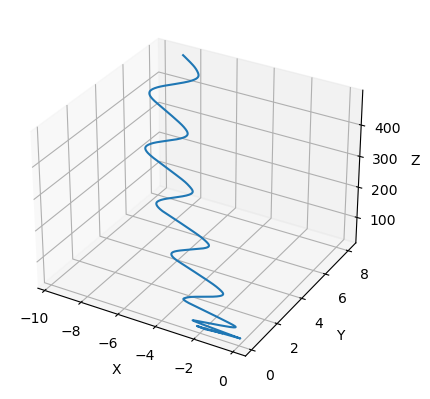

In [88]:
fig = plt.figure()
ax = plt.axes(projection='3d')


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')



ax.plot3D(pos_sindy6_dp[:,0],pos_sindy6_dp[:,1],pos_sindy6_dp[:,2])
plt.show()

In [89]:
pos_sindy6

array([[-1.02045149e+00,  2.29333253e-01,  2.46083406e+01],
       [-1.02125259e+00,  2.28987324e-01,  2.46079504e+01],
       [-1.02201320e+00,  2.28635128e-01,  2.46076948e+01],
       ...,
       [-8.57546421e+00,  8.11147898e+00,  4.99184351e+02],
       [-8.59245769e+00,  8.11530687e+00,  4.99594499e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

#### 7th Model(v)

In [90]:
dt = 0.02
stlsq_optimizer = ps.STLSQ(threshold=.2, alpha=.3)

library_functions = [
   

    lambda x : x*x*x,
    lambda x,y : x*y,
    lambda x : np.exp(-x),
    lambda x : np.sin(x),
    lambda x,y : np.sin(x*y),
    lambda x,y : np.power(x,3)*np.power(y,3)
]
library_function_names = [
   
   
    lambda x : '*' + 'np.power' + '(' + x + ',' + '3' + ')',
    lambda x,y : '*' + x + '*' + y,
    lambda x : '*' + 'np.exp(' + '-' + x + ')',
    lambda x : '*' + 'np.sin' +'(' + x + ')',
    lambda x,y : '*' + 'np.sin' + '(' + x + '*' + y + ')' ,
    lambda x,y : '*'  + 'np.power(' + x + ',' + '3' + ')' + '*np.power(' + y + ',' + '3)' 
]
custom_library = ps.CustomLibrary(
    library_functions=library_functions, function_names=library_function_names
)

model = ps.SINDy(feature_library=custom_library, optimizer=stlsq_optimizer)
model.fit(v, u=Rfu, t=dt)
model.print()

(x0)' = -518.478 *x0*x1 + -240.311 *x0*u0 + 1.112 *x0*u2 + 323.677 *x2*u0 + -1.918 *x2*u2 + -10132.827 *u0*u2 + 1.641 *np.exp(-x1) + 24.519 *np.exp(-u0) + -2.421 *np.exp(-u1) + -25.391 *np.exp(-u2) + -0.453 *np.sin(x0) + 23.765 *np.sin(u0) + -20.027 *np.sin(u2) + 517.921 *np.sin(x0*x1) + 239.443 *np.sin(x0*u0) + -0.854 *np.sin(x0*u2) + -326.585 *np.sin(x2*u0) + 2.531 *np.sin(x2*u2) + 10180.877 *np.sin(u0*u2)
(x1)' = 1665967.163 *u1*u2 + 8.227 *np.sin(u1) + -1665989.640 *np.sin(u1*u2)
(x2)' = -60.260 *np.power(u2,3) + 2018.548 *x0*u0 + 1018.994 *x0*u2 + 86156.243 *x1*u2 + -158.377 *x2*u0 + 105.162 *x2*u2 + -22860.764 *u0*u2 + 98412.856 *u1*u2 + -0.992 *np.exp(-x0) + 120.457 *np.exp(-x1) + -965.574 *np.exp(-u1) + 868.880 *np.exp(-u2) + -4.084 *np.sin(x0) + 118.059 *np.sin(x1) + 0.467 *np.sin(x2) + -949.086 *np.sin(u1) + 683.742 *np.sin(u2) + -1999.826 *np.sin(x0*u0) + -1014.317 *np.sin(x0*u2) + -86152.258 *np.sin(x1*u2) + 152.555 *np.sin(x2*u0) + -106.426 *np.sin(x2*u2) + 22856.573 *np.s

In [91]:
accel3 = np.zeros((2511,3),dtype = np.float64)
for ele in range(2511):
    accel3[ele][0] = -518.478 *v[ele][0]*v[ele][1] + -240.311 *v[ele][0]*Rfu[ele][0] + 1.112 *v[ele][0]*Rfu[ele][2] + 323.677 *v[ele][2]*Rfu[ele][0] + -1.918 *v[ele][2]*Rfu[ele][2] + -10132.827 *Rfu[ele][0]*Rfu[ele][2] + 1.641 *np.exp(-v[ele][1]) + 24.519 *np.exp(-Rfu[ele][0]) + -2.421 *np.exp(-Rfu[ele][1]) + -25.391 *np.exp(-Rfu[ele][2]) + -0.453 *np.sin(v[ele][0]) + 23.765 *np.sin(Rfu[ele][0]) + -20.027 *np.sin(Rfu[ele][2]) + 517.921 *np.sin(v[ele][0]*v[ele][1]) + 239.443 *np.sin(v[ele][0]*Rfu[ele][0]) + -0.854 *np.sin(v[ele][0]*Rfu[ele][2]) + -326.585 *np.sin(v[ele][2]*Rfu[ele][0]) + 2.531 *np.sin(v[ele][2]*Rfu[ele][2]) + 10180.877 *np.sin(Rfu[ele][0]*Rfu[ele][2])
    
for ele in range(2511):
    accel3[ele][1] = 1665967.163 *Rfu[ele][1]*Rfu[ele][2] + 8.227 *np.sin(Rfu[ele][1]) + -1665989.640 *np.sin(Rfu[ele][1]*Rfu[ele][2])
    
for ele in range(2511):
    accel3[ele][2] = -60.260 *np.power(Rfu[ele][2],3) + 2018.548 *v[ele][0]*Rfu[ele][0] + 1018.994 *v[ele][0]*Rfu[ele][2] + 86156.243 *v[ele][1]*Rfu[ele][2] + -158.377 *v[ele][2]*Rfu[ele][0] + 105.162 *v[ele][2]*Rfu[ele][2] + -22860.764 *Rfu[ele][0]*Rfu[ele][2] + 98412.856 *Rfu[ele][1]*Rfu[ele][2] + -0.992 *np.exp(-v[ele][0]) + 120.457 *np.exp(-v[ele][1]) + -965.574 *np.exp(-Rfu[ele][1]) + 868.880 *np.exp(-Rfu[ele][2]) + -4.084 *np.sin(v[ele][0]) + 118.059 *np.sin(v[ele][1]) + 0.467 *np.sin(v[ele][2]) + -949.086 *np.sin(Rfu[ele][1]) + 683.742 *np.sin(Rfu[ele][2]) + -1999.826 *np.sin(v[ele][0]*Rfu[ele][0]) + -1014.317 *np.sin(v[ele][0]*Rfu[ele][2]) + -86152.258 *np.sin(v[ele][1]*Rfu[ele][2]) + 152.555 *np.sin(v[ele][2]*Rfu[ele][0]) + -106.426 *np.sin(v[ele][2]*Rfu[ele][2]) + 22856.573 *np.sin(Rfu[ele][0]*Rfu[ele][2]) + -98432.008 *np.sin(Rfu[ele][1]*Rfu[ele][2]) + -172.973 *np.power(v[ele][0],3)*np.power(Rfu[ele][2],3) + -15.583 *np.power(v[ele][2],3)*np.power(Rfu[ele][2],3)
    
    

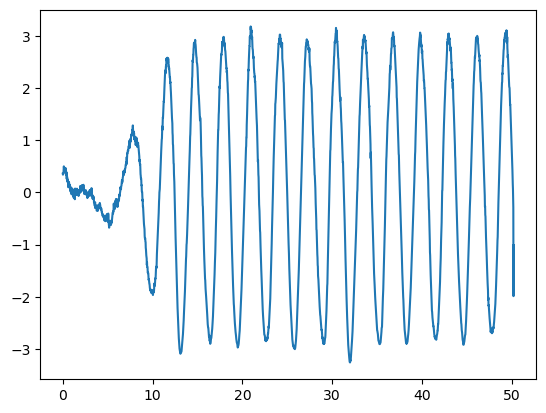

In [92]:
fig = plt.figure()
plt.plot(t, accel3[:,2])
plt.show()

In [93]:
#errorx = 0.0
#for ele in range(2510):
#    temp = np.square(np.subtract(accel8[ele][0],accx[ele]))
#    errorx = errorx + temp
#errorx = errorx/2510
#print(errorx)

#errory = 0.0
#for ele in range(2510):
#    temp = np.square(np.subtract(accel8[ele][1],accy[ele]))
#    errory = errory + temp
#errory = errory/2510
#print(errory)

#errorz= 0.0
#for ele in range(2510):
#    temp = np.square(np.subtract(accel8[ele][2],accz[ele]))
#    errorz= errorz+ temp
#errorz= errorz/2510
#print(errorz)

In [94]:
def acc7(tk,yk):
    count = tk/0.02
    return accel3[int(count)]

In [95]:
vel7 = np.zeros((2511,3),dtype = np.float64)
yk = v[0]
dt = 0.02
tk = 0
for ele in range(2510):
    ykplus1 = rk4(acc7,tk,yk,dt)
    vel7[ele] = ykplus1
    tk = tk+0.02
    yk = ykplus1 

In [96]:
def velocity7(tk,yk):
    count = tk/0.02
    return vel7[int(count)]

In [97]:
pos_sindy7 = np.zeros((2511,3),dtype = np.float64)
xk = pos[0]
dt = 0.02
tk = 0
for ele in range(2510):
    ykplus1 = rk4(velocity7,tk,yk,dt)
    pos_sindy7[ele] = ykplus1
    tk = tk+0.02
    yk = ykplus1

In [194]:
#mse
errorx = 0.0
for ele in range(2510):
    temp = np.square(np.subtract(pos_sindy12[ele][0],posx[ele]))
    errorx = errorx + temp
errorx = errorx/2510
print(errorx)

errory = 0.0
for ele in range(2510):
    temp = np.square(np.subtract(pos_sindy12[ele][1],posy[ele]))
    errory = errory + temp
errory = errory/2510
print(errory)

errorz= 0.0
for ele in range(2510):
    temp = np.square(np.subtract(pos_sindy12[ele][2],posz[ele]))
    errorz= errorz+ temp
errorz= errorz/2510
print(errorz)

[73.28469442]
[38.83021967]
[75.25132077]


In [99]:
pos_sindy7_dp = np.zeros((2509,3),dtype = np.float64)
for ele in range(2509):
    pos_sindy7_dp[ele] = pos_sindy7[ele]

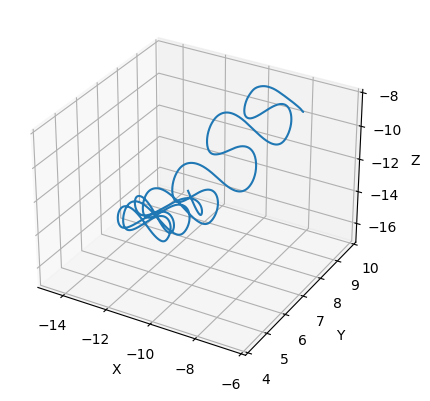

In [100]:
fig = plt.figure()
ax = plt.axes(projection='3d')


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


ax.set_xlim3d([-15, -6])
ax.set_ylim3d([4, 10])
ax.set_zlim3d([-17, -8])

ax.plot3D(pos_sindy7_dp[:,0],pos_sindy7_dp[:,1],pos_sindy7_dp[:,2])
plt.show()

In [101]:
print(pos_sindy7[650,:])

[-3.39681462  0.15237078  0.74367994]


#### 8th Model(v)

In [102]:
dt = 0.02
stlsq_optimizer = ps.STLSQ(threshold=.2, alpha=.3)

library_functions = [
    
    lambda x,y : np.sin(x)*np.sin(y),
    lambda x : np.sin(x),
    lambda x,y : np.sin(x*y)
]
library_function_names = [
 
    lambda x,y : '*' + 'np.sin(' + x + ')*np.sin(' + y + ')',
    lambda x : '*' + 'np.sin' +'(' + x + ')',
    lambda x,y : '*' + 'np.sin' + '(' + x + '*' + y + ')' 
]
custom_library = ps.CustomLibrary(
    library_functions=library_functions, function_names=library_function_names
)

model = ps.SINDy(feature_library=custom_library, optimizer=stlsq_optimizer)
model.fit(v, u=Rfu, t=dt)
model.print()

(x0)' = 6.523 *np.sin(x0)*np.sin(x1) + 27.191 *np.sin(x0)*np.sin(u0) + -5.496 *np.sin(x0)*np.sin(u2) + 17.038 *np.sin(x1)*np.sin(u2) + -2.397 *np.sin(x2)*np.sin(u0) + 580.548 *np.sin(u0)*np.sin(u2) + -0.412 *np.sin(x0) + -4.847 *np.sin(x1) + -16.637 *np.sin(u0) + -2.718 *np.sin(u2) + -5.767 *np.sin(x0*x1) + -24.615 *np.sin(x0*u0) + 4.838 *np.sin(x0*u2) + -0.313 *np.sin(x1*x2) + -8.957 *np.sin(x1*u2) + 0.676 *np.sin(x2*u0) + -1.221 *np.sin(x2*u1) + 0.431 *np.sin(x2*u2) + -476.191 *np.sin(u0*u2)
(x1)' = -229.303 *np.sin(u1)*np.sin(u2) + 2.763 *np.sin(u1) + 217.584 *np.sin(u1*u2)
(x2)' = 1.631 *np.sin(x0)*np.sin(x1) + 1.882 *np.sin(x0)*np.sin(x2) + 195.561 *np.sin(x0)*np.sin(u0) + 285.296 *np.sin(x0)*np.sin(u1) + -25.781 *np.sin(x0)*np.sin(u2) + 28.657 *np.sin(x1)*np.sin(x2) + 1442.811 *np.sin(x1)*np.sin(u2) + -20.035 *np.sin(x2)*np.sin(u0) + 74.849 *np.sin(x2)*np.sin(u1) + 6.697 *np.sin(x2)*np.sin(u2) + 766645.838 *np.sin(u0)*np.sin(u1) + 4172.582 *np.sin(u0)*np.sin(u2) + -14645.263 *np.

In [103]:
accel4 = np.zeros((2511,3),dtype = np.float64)
for ele in range(2511):
    accel4[ele][0] = 6.523 *np.sin(v[ele][0])*np.sin(v[ele][1]) + 27.191 *np.sin(v[ele][0])*np.sin(Rfu[ele][0]) + -5.496 *np.sin(v[ele][0])*np.sin(Rfu[ele][2]) + 17.038 *np.sin(v[ele][1])*np.sin(Rfu[ele][2]) + -2.397 *np.sin(v[ele][2])*np.sin(Rfu[ele][0]) + 580.548 *np.sin(Rfu[ele][0])*np.sin(Rfu[ele][2]) + -0.412 *np.sin(v[ele][0]) + -4.847 *np.sin(v[ele][1]) + -16.637 *np.sin(Rfu[ele][0]) + -2.718 *np.sin(Rfu[ele][2]) + -5.767 *np.sin(v[ele][0]*v[ele][1]) + -24.615 *np.sin(v[ele][0]*Rfu[ele][0]) + 4.838 *np.sin(v[ele][0]*Rfu[ele][2]) + -0.313 *np.sin(v[ele][1]*v[ele][2]) + -8.957 *np.sin(v[ele][1]*Rfu[ele][2]) + 0.676 *np.sin(v[ele][2]*Rfu[ele][0]) + -1.221 *np.sin(v[ele][2]*Rfu[ele][1]) + 0.431 *np.sin(v[ele][2]*Rfu[ele][2]) + -476.191 *np.sin(Rfu[ele][0]*Rfu[ele][2])
    
for ele in range(2511):
    accel4[ele][1] = -229.303 *np.sin(Rfu[ele][1])*np.sin(Rfu[ele][2]) + 2.763 *np.sin(Rfu[ele][1]) + 217.584 *np.sin(Rfu[ele][1]*Rfu[ele][2])
    
for ele in range(2511):
    accel4[ele][2] = 1.631 *np.sin(v[ele][0])*np.sin(v[ele][1]) + 1.882 *np.sin(v[ele][0])*np.sin(v[ele][2]) + 195.561 *np.sin(v[ele][0])*np.sin(Rfu[ele][0]) + 285.296 *np.sin(v[ele][0])*np.sin(Rfu[ele][1]) + -25.781 *np.sin(v[ele][0])*np.sin(Rfu[ele][2]) + 28.657 *np.sin(v[ele][1])*np.sin(v[ele][2]) + 1442.811 *np.sin(v[ele][1])*np.sin(Rfu[ele][2]) + -20.035 *np.sin(v[ele][2])*np.sin(Rfu[ele][0]) + 74.849 *np.sin(v[ele][2])*np.sin(Rfu[ele][1]) + 6.697 *np.sin(v[ele][2])*np.sin(Rfu[ele][2]) + 766645.838 *np.sin(Rfu[ele][0])*np.sin(Rfu[ele][1]) + 4172.582 *np.sin(Rfu[ele][0])*np.sin(Rfu[ele][2]) + -14645.263 *np.sin(Rfu[ele][1])*np.sin(Rfu[ele][2]) + -0.625 *np.sin(v[ele][0]) + -66.539 *np.sin(v[ele][1]) + -3.482 *np.sin(v[ele][2]) + -271.082 *np.sin(Rfu[ele][0]) + 89.997 *np.sin(Rfu[ele][1]) + 1.209 *np.sin(Rfu[ele][2]) + -2.867 *np.sin(v[ele][0]*v[ele][1]) + -143.364 *np.sin(v[ele][0]*Rfu[ele][0]) + -257.163 *np.sin(v[ele][0]*Rfu[ele][1]) + 18.568 *np.sin(v[ele][0]*Rfu[ele][2]) + -18.765 *np.sin(v[ele][1]*v[ele][2]) + -1250.407 *np.sin(v[ele][1]*Rfu[ele][2]) + 2.514 *np.sin(v[ele][2]*Rfu[ele][0]) + -55.661 *np.sin(v[ele][2]*Rfu[ele][1]) + 1.389 *np.sin(v[ele][2]*Rfu[ele][2]) + -764407.245 *np.sin(Rfu[ele][1]*Rfu[ele][0]) + -3462.487 *np.sin(Rfu[ele][0]*Rfu[ele][2]) + 13721.837 *np.sin(Rfu[ele][1]*Rfu[ele][2])

In [104]:
def acc8(tk,yk):
    count = tk/0.02
    return accel4[int(count)]

In [105]:
vel8 = np.zeros((2511,3),dtype = np.float64)
yk = v[0]
dt = 0.02
tk = 0
for ele in range(2510):
    ykplus1 = rk4(acc8,tk,yk,dt)
    vel8[ele] = ykplus1
    tk = tk+0.02
    yk = ykplus1 

In [106]:
def velocity8(tk,yk):
    count = tk/0.02
    return vel8[int(count)]

In [107]:
pos_sindy8 = np.zeros((2511,3),dtype = np.float64)
xk = pos[0]
dt = 0.02
tk = 0
for ele in range(2510):
    ykplus1 = rk4(velocity8,tk,yk,dt)
    pos_sindy8[ele] = ykplus1
    tk = tk+0.02
    yk = ykplus1

In [108]:
pos_sindy8_dp = np.zeros((2509,3),dtype = np.float64)
for ele in range(2509):
    pos_sindy8_dp[ele] = pos_sindy8[ele]

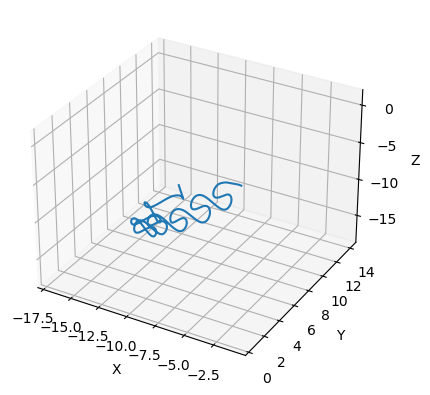

In [109]:
fig = plt.figure()
ax = plt.axes(projection='3d')


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')



ax.plot3D(pos_sindy8_dp[:,0],pos_sindy8_dp[:,1],pos_sindy8_dp[:,2])
plt.show()

#### 9th Model(v)

In [110]:
dt = 0.02
stlsq_optimizer = ps.STLSQ(threshold=.2, alpha=.3)

library_functions = [
    lambda x : np.cos(x),
    
    lambda x,y : np.sin(x)*np.sin(y),
    lambda x : np.sin(x),
    lambda x,y : np.sin(x*y)
]
library_function_names = [
    lambda x : '*np.cos(' + x + ')',
    
    lambda x,y : '*' + 'np.sin(' + x + ')*np.sin(' + y + ')',
    lambda x : '*' + 'np.sin' +'(' + x + ')',
    lambda x,y : '*' + 'np.sin' + '(' + x + '*' + y + ')' 
]
custom_library = ps.CustomLibrary(
    library_functions=library_functions, function_names=library_function_names
)

model = ps.SINDy(feature_library=custom_library, optimizer=stlsq_optimizer)
model.fit(v, u=Rfu, t=dt)
model.print()

(x0)' = -0.888 *np.cos(u0) + 0.127 *np.cos(u2) + 0.737 *np.sin(x0)*np.sin(x1) + 1.297 *np.sin(x0)*np.sin(u2) + -137.039 *np.sin(x1)*np.sin(u2) + -2.086 *np.sin(x2)*np.sin(u0) + 391.990 *np.sin(u0)*np.sin(u2) + -0.479 *np.sin(x0) + 4.993 *np.sin(x1) + -2.110 *np.sin(u0) + -0.886 *np.sin(u2) + -1.393 *np.sin(x0*x1) + -1.726 *np.sin(x0*u0) + -0.663 *np.sin(x0*u2) + 118.141 *np.sin(x1*u2) + 0.452 *np.sin(x2*u0) + 0.402 *np.sin(x2*u2) + -327.333 *np.sin(u0*u2)
(x1)' = -229.303 *np.sin(u1)*np.sin(u2) + 2.763 *np.sin(u1) + 217.584 *np.sin(u1*u2)
(x2)' = 0.971 *np.cos(x0) + -11.019 *np.cos(u2) + -1.008 *np.sin(x0)*np.sin(x2) + 35.959 *np.sin(x0)*np.sin(u0) + -2.593 *np.sin(x0)*np.sin(u2) + -1326.165 *np.sin(x1)*np.sin(u2) + -5.802 *np.sin(x2)*np.sin(u0) + -1.777 *np.sin(x2)*np.sin(u2) + 1576.472 *np.sin(u0)*np.sin(u2) + -15462.370 *np.sin(u1)*np.sin(u2) + -0.657 *np.sin(x0) + 43.442 *np.sin(x1) + -64.562 *np.sin(u0) + 555.501 *np.sin(u1) + 20.384 *np.sin(u2) + -0.694 *np.sin(x0*x1) + 1.149 *np

In [111]:
accel5 = np.zeros((2511,3),dtype = np.float64)
for ele in range(2511):
    accel5[ele][0] = -0.888 *np.cos(Rfu[ele][0]) + 0.127 *np.cos(Rfu[ele][2]) + 0.737 *np.sin(v[ele][0])*np.sin(v[ele][1]) + 1.297 *np.sin(v[ele][0])*np.sin(Rfu[ele][2]) + -137.039 *np.sin(v[ele][1])*np.sin(Rfu[ele][2]) + -2.086 *np.sin(v[ele][2])*np.sin(Rfu[ele][0]) + 391.990 *np.sin(Rfu[ele][0])*np.sin(Rfu[ele][2]) + -0.479 *np.sin(v[ele][0]) + 4.993 *np.sin(v[ele][1]) + -2.110 *np.sin(Rfu[ele][0]) + -0.886 *np.sin(Rfu[ele][2]) + -1.393 *np.sin(v[ele][0]*v[ele][1]) + -1.726 *np.sin(v[ele][0]*Rfu[ele][0]) + -0.663 *np.sin(v[ele][0]*Rfu[ele][2]) + 118.141 *np.sin(v[ele][1]*Rfu[ele][2]) + 0.452 *np.sin(Rfu[ele][0]*v[ele][2]) + 0.402 *np.sin(v[ele][2]*Rfu[ele][2]) + -327.333 *np.sin(Rfu[ele][0]*Rfu[ele][2])
    
for ele in range(2511):
    accel[ele][1] = -229.303 *np.sin(Rfu[ele][1])*np.sin(Rfu[ele][2]) + 2.763 *np.sin(Rfu[ele][1]) + 217.584 *np.sin(Rfu[ele][1]*Rfu[ele][2])
    
for ele in range(2511):
    accel[ele][2] = 0.971 *np.cos(v[ele][0]) + -11.019 *np.cos(Rfu[ele][2]) + -1.008 *np.sin(v[ele][0])*np.sin(v[ele][2]) + 35.959 *np.sin(v[ele][0])*np.sin(Rfu[ele][0]) + -2.593 *np.sin(v[ele][0])*np.sin(Rfu[ele][2]) + -1326.165 *np.sin(v[ele][1])*np.sin(Rfu[ele][2]) + -5.802 *np.sin(v[ele][2])*np.sin(Rfu[ele][0]) + -1.777 *np.sin(v[ele][2])*np.sin(Rfu[ele][2]) + 1576.472 *np.sin(Rfu[ele][0])*np.sin(Rfu[ele][2]) + -15462.370 *np.sin(Rfu[ele][1])*np.sin(Rfu[ele][2]) + -0.657 *np.sin(v[ele][0]) + 43.442 *np.sin(v[ele][1]) + -64.562 *np.sin(Rfu[ele][0]) + 555.501 *np.sin(Rfu[ele][1]) + 20.384 *np.sin(Rfu[ele][2]) + -0.694 *np.sin(v[ele][0]*v[ele][1]) + 1.149 *np.sin(v[ele][2]*v[ele][0]) + -18.331 *np.sin(v[ele][0]*Rfu[ele][0]) + 2.038 *np.sin(v[ele][0]*Rfu[ele][2]) + 1186.944 *np.sin(v[ele][1]*Rfu[ele][2]) + 1.665 *np.sin(v[ele][2]*Rfu[ele][2]) + -1385.619 *np.sin(Rfu[ele][0]*Rfu[ele][2]) + 13711.006 *np.sin(Rfu[ele][1]*Rfu[ele][2])

In [112]:
def acc9(tk,yk):
    count = tk/0.02
    return accel5[int(count)]

In [113]:
vel9 = np.zeros((2511,3),dtype = np.float64)
yk = v[0]
dt = 0.02
tk = 0
for ele in range(2510):
    ykplus1 = rk4(acc9,tk,yk,dt)
    vel9[ele] = ykplus1
    tk = tk+0.02
    yk = ykplus1 

In [114]:
def velocity9(tk,yk):
    count = tk/0.02
    return vel9[int(count)]

In [115]:
pos_sindy9 = np.zeros((2511,3),dtype = np.float64)
xk = pos[0]
dt = 0.02
tk = 0
for ele in range(2510):
    ykplus1 = rk4(velocity9,tk,yk,dt)
    pos_sindy9[ele] = ykplus1
    tk = tk+0.02
    yk = ykplus1

In [116]:
pos_sindy9_dp = np.zeros((2509,3),dtype = np.float64)
for ele in range(2509):
    pos_sindy9_dp[ele] = pos_sindy9[ele]

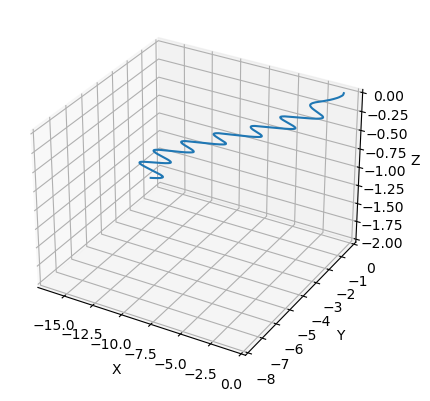

In [117]:
fig = plt.figure()
ax = plt.axes(projection='3d')


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_xlim3d([-17, 0])
ax.set_ylim3d([-8, 0])
ax.set_zlim3d([-2, -0])


ax.plot3D(pos_sindy9_dp[:,0],pos_sindy9_dp[:,1],pos_sindy9_dp[:,2])
plt.show()

In [118]:
pos_sindy9

array([[ -1.00416298,  -0.0170122 ,  -0.03479892],
       [ -1.00499346,  -0.01734577,  -0.03548125],
       [ -1.00579815,  -0.01767934,  -0.03616359],
       ...,
       [-16.8937573 ,  -0.85361191,  -1.74608709],
       [-16.91047905,  -0.85388989,  -1.7466557 ],
       [  0.        ,   0.        ,   0.        ]])

#### 10th Model(v)

In [29]:
dt = 0.02
stlsq_optimizer = ps.STLSQ(threshold=.11, alpha=.3)
from sklearn.model_selection import train_test_split

library_functions = [
    lambda x : 1,
    lambda x : np.cos(x),
    lambda x,y : x*y,
    lambda x,y : np.sin(x)*np.sin(y),
    lambda x : np.sin(x),
    lambda x,y : np.sin(x*y)
]
library_function_names = [
    lambda x : '*1',
    lambda x : '*np.cos(' + x + ')',
    lambda x,y : '*' + x + '*' + y,
    lambda x,y : '*' + 'np.sin(' + x + ')*np.sin(' + y + ')',
    lambda x : '*' + 'np.sin' +'(' + x + ')',
    lambda x,y : '*' + 'np.sin' + '(' + x + '*' + y + ')' 
]
custom_library = ps.CustomLibrary(
    library_functions=library_functions, function_names=library_function_names
)

v_train, v_test, Rfu_train, Rfu_test, acc_train, acc_test = train_test_split(v, Rfu, acc_v1, test_size=0.33,shuffle=False)

model = ps.SINDy(feature_library=custom_library, optimizer=stlsq_optimizer)
model.fit(v_train, u=Rfu_train, t=dt)
model.print()

(x0)' = 0.117 *np.cos(x2) + -38.872 *np.cos(u0) + 34.630 *np.cos(u2) + 2389.704 *x0*x1 + 9.308 *x0*u2 + -35587.057 *x1*u2 + -361.210 *x2*u0 + -4.035 *x2*u2 + -18038.622 *u0*u2 + -1.234 *np.sin(x0)*np.sin(x1) + 1.954 *np.sin(x0)*np.sin(u2) + 312.056 *np.sin(x1)*np.sin(u2) + -8.978 *np.sin(x2)*np.sin(u0) + -1290.917 *np.sin(u0)*np.sin(u2) + 0.146 *np.sin(x0) + -5.763 *np.sin(x1) + -0.157 *np.sin(x2) + 38.352 *np.sin(u0) + 3.479 *np.sin(u1) + 14.847 *np.sin(u2) + -2388.859 *np.sin(x0*x1) + -12.326 *np.sin(x0*u2) + 35296.557 *np.sin(x1*u2) + 367.459 *np.sin(x2*u0) + 4.923 *np.sin(x2*u2) + 19246.056 *np.sin(u0*u2)
(x1)' = 1662665.244 *u1*u2 + 497.630 *np.sin(u1)*np.sin(u2) + -5.315 *np.sin(u1) + -1663137.531 *np.sin(u1*u2)
(x2)' = 0.102 *np.cos(x0) + 0.162 *np.cos(x2) + -13.464 *np.cos(u2) + 2026.197 *x0*x1 + 2362.418 *x0*u0 + -221310.924 *x0*u1 + 11.649 *x0*u2 + 2265.360 *x1*x2 + 76648.767 *x1*u2 + -2.695 *x2*u2 + -618.892 *u0*u2 + 1875828.891 *u1*u2 + -1.881 *np.sin(x0)*np.sin(x2) + 8.289

In [30]:
accel_predicted = model.predict(v_test, u = Rfu_test)
test_error_res = (np.sum((accel_predicted - acc_test)**2))/len(accel_predicted)
test_error_res

AxesArray(0.57270323)

In [33]:
mae = mean_absolute_error(acc_test, accel_predicted)
mse = mean_squared_error(acc_test, accel_predicted)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)

Mean Absolute Error: 0.3065050236994962
Mean Squared Error: 0.1909010768323179


In [34]:
accel_pred_train = model.predict(v_train, u = Rfu_train)
train_error_res = (np.sum((accel_pred_train - acc_train)**2))/len(accel_pred_train)
train_error_res

AxesArray(0.44039643)

In [35]:
mae = mean_absolute_error(acc_train, accel_pred_train)
mse = mean_squared_error(acc_train, accel_pred_train)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)

Mean Absolute Error: 0.2832371294084622
Mean Squared Error: 0.1467988116330032


In [27]:
accel6 = np.zeros((2511,3),dtype = np.float64)
for ele in range(2511):
    accel6[ele][0] = -12.145 *np.cos(Rfu[ele][0]) + 10.625 *np.cos(Rfu[ele][2]) + 1605.671 *v[ele][0]*v[ele][1] + -497.175 *v[ele][0]*Rfu[ele][0] + -0.506 *v[ele][0]*Rfu[ele][2] + -45850.414 *v[ele][1]*Rfu[ele][2] + 409.648 *v[ele][2]*Rfu[ele][0] + -7249.475 *Rfu[ele][0]*Rfu[ele][2] + -1.588 *np.sin(v[ele][0])*np.sin(v[ele][1]) + -0.279 *np.sin(v[ele][0])*np.sin(Rfu[ele][2]) + -31.246 *np.sin(v[ele][1])*np.sin(Rfu[ele][2]) + 3.938 *np.sin(v[ele][2])*np.sin(Rfu[ele][0]) + -55.416 *np.sin(Rfu[ele][0])*np.sin(Rfu[ele][2]) + -0.542 *np.sin(v[ele][0]) + 2.125 *np.sin(v[ele][1]) + 3.986 *np.sin(Rfu[ele][0]) + 3.317 *np.sin(Rfu[ele][2]) + -1604.334 *np.sin(v[ele][0]*v[ele][1]) + 497.095 *np.sin(v[ele][0]*Rfu[ele][0]) + 1.153 *np.sin(v[ele][0]*Rfu[ele][2]) + 45873.318 *np.sin(v[ele][1]*Rfu[ele][2]) + -415.599 *np.sin(Rfu[ele][0]*v[ele][2]) + 0.472 *np.sin(v[ele][2]*Rfu[ele][2]) + 7340.688 *np.sin(Rfu[ele][0]*Rfu[ele][2])
    
for ele in range(2511):
    accel6[ele][1] = 1879876.770 *Rfu[ele][1]*Rfu[ele][2] + -0.511 *np.sin(v[ele][0])*np.sin(v[ele][2]) + 0.371 *np.sin(v[ele][2])*np.sin(Rfu[ele][0]) + 850.942 *np.sin(Rfu[ele][1])*np.sin(Rfu[ele][2]) + -16.957 *np.sin(Rfu[ele][1]) + 0.432 *np.sin(v[ele][0]*v[ele][2]) + -1880663.902 *np.sin(Rfu[ele][1]*Rfu[ele][2])
    
for ele in range(2511):
    accel6[ele][2] = 1.116 *np.cos(v[ele][0]) + -10.889 *np.cos(Rfu[ele][2]) + -4812.129 *v[ele][0]*Rfu[ele][0] + 18.068 *v[ele][0]*Rfu[ele][2] + 46751.467 *v[ele][1]*Rfu[ele][2] + -0.207 *v[ele][2]*Rfu[ele][2] + -22498.141 *Rfu[ele][0]*Rfu[ele][2] + -1082428.141 *Rfu[ele][1]*Rfu[ele][2] + -1.368 *np.sin(v[ele][0])*np.sin(v[ele][2]) + -47.367 *np.sin(v[ele][0])*np.sin(Rfu[ele][0]) + 6.311 *np.sin(v[ele][0])*np.sin(Rfu[ele][2]) + -1463.891 *np.sin(v[ele][1])*np.sin(Rfu[ele][2]) + -1.570 *np.sin(v[ele][2])*np.sin(Rfu[ele][2]) + -469.816 *np.sin(Rfu[ele][0])*np.sin(Rfu[ele][2]) + -9450.598 *np.sin(Rfu[ele][1])*np.sin(Rfu[ele][2]) + 0.665 *np.sin(v[ele][0]) + 57.075 *np.sin(v[ele][1]) + 354.485 *np.sin(Rfu[ele][1]) + 18.611 *np.sin(Rfu[ele][2]) + 1.163 *np.sin(v[ele][0]*v[ele][2]) + 4876.856 *np.sin(Rfu[ele][0]*v[ele][0]) + -27.886 *np.sin(v[ele][0]*Rfu[ele][2]) + -45463.147 *np.sin(v[ele][1]*Rfu[ele][2]) + 1.086 *np.sin(v[ele][2]*Rfu[ele][2]) + 22967.292 *np.sin(Rfu[ele][0]*Rfu[ele][2]) + 1090802.029 *np.sin(Rfu[ele][1]*Rfu[ele][2])

In [28]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mae = mean_absolute_error(acc_v1, accel6)
mse = mean_squared_error(acc_v1, accel6)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)

Mean Absolute Error: 0.290908963434991
Mean Squared Error: 0.15956747221217427


0.06216495565854052 0.11270936376209936 0.3037883129110675


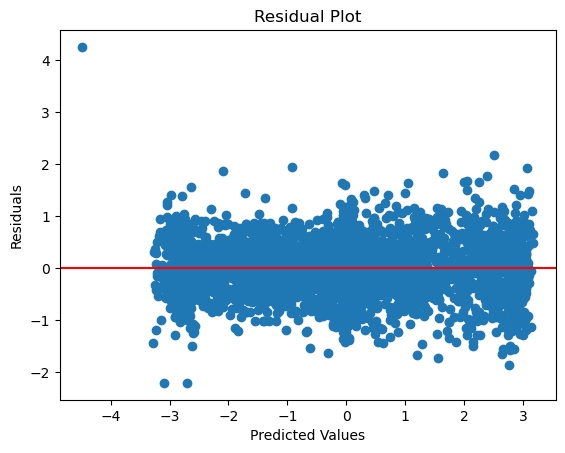

In [123]:
residuals = np.array(acc_v1) - np.array(accel6)
print(np.var(residuals[:,0]),np.var(residuals[:,1]),np.var(residuals[:,2]))# Plot the residuals against the predicted values
plt.scatter(accel6, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

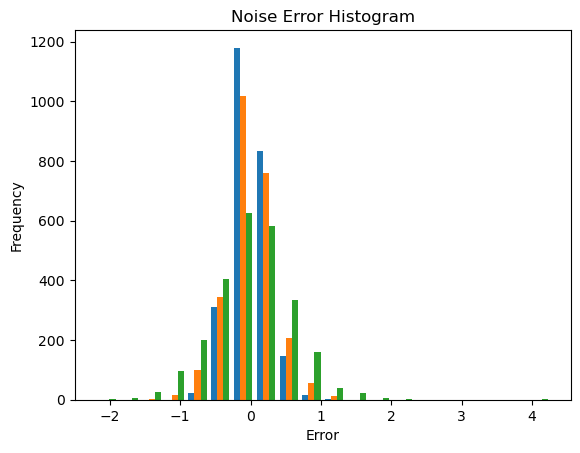

In [124]:
plt.hist(residuals, bins=20)
plt.title('Noise Error Histogram')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

In [125]:
def acc10(tk,yk):
    count = tk/0.02
    return accel6[int(count)]

In [126]:
vel10 = np.zeros((2511,3),dtype = np.float64)
yk = v[0]
dt = 0.02
tk = 0
for ele in range(2510):
    ykplus1 = rk4(acc10,tk,yk,dt)
    vel10[ele] = ykplus1
    tk = tk+0.02
    yk = ykplus1 

In [127]:
def velocity10(tk,yk):
    count = tk/0.02
    return vel10[int(count)]

In [128]:
pos_sindy10 = np.zeros((2511,3),dtype = np.float64)
xk = pos[0]
dt = 0.02
tk = 0
for ele in range(2510):
    ykplus1 = rk4(velocity10,tk,yk,dt)
    pos_sindy10[ele] = ykplus1
    tk = tk+0.02
    yk = ykplus1

In [129]:
pos_sindy10_dp = np.zeros((2509,3),dtype = np.float64)
for ele in range(2509):
    pos_sindy10_dp[ele] = pos_sindy10[ele]

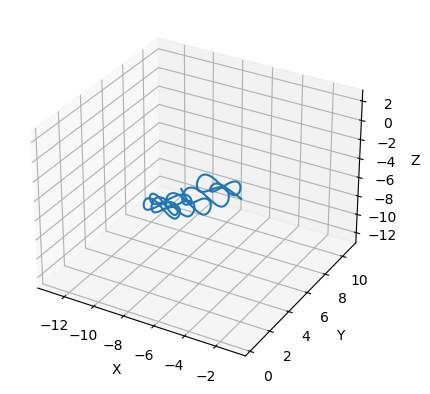

In [130]:
fig = plt.figure()
ax = plt.axes(projection='3d')


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')




ax.plot3D(pos_sindy10_dp[:,0],pos_sindy10_dp[:,1],pos_sindy10_dp[:,2])
plt.show()

In [131]:
pos_sindy10

array([[ -0.99586701,   0.32924944,   1.51695773],
       [ -0.99668214,   0.3289116 ,   1.51661568],
       [ -0.99746395,   0.32857174,   1.51642825],
       ...,
       [-11.75870891,  10.79959434, -11.83750616],
       [-11.77529253,  10.80508743, -11.81221526],
       [  0.        ,   0.        ,   0.        ]])

#### 11th Model(v)

In [132]:
dt = 0.02
stlsq_optimizer = ps.STLSQ(threshold=.3, alpha=.3)

library_functions = [
    
    lambda x : np.cos(x),
    lambda x,y : x*y,
    lambda x,y : np.sin(x)*np.sin(y),
    lambda x : np.sin(x),
    lambda x,y : np.sin(x*y),
    lambda x,y : np.exp(x)*np.sin(y),
    lambda x,y : np.exp(-x)*np.sin(y)
]
library_function_names = [
    
    lambda x : '*np.cos(' + x + ')',
    lambda x,y : '*' + x + '*' + y,
    lambda x,y : '*' + 'np.sin(' + x + ')*np.sin(' + y + ')',
    lambda x : '*' + 'np.sin' +'(' + x + ')',
    lambda x,y : '*' + 'np.sin' + '(' + x + '*' + y + ')' ,
    lambda x,y : '*np.exp(' + x + ')' + '*np.sin(' + y + ')',
    lambda x,y : '*np.exp(' + '-' + x + ')' + '*np.sin(' + y + ')'
]
custom_library = ps.CustomLibrary(
    library_functions=library_functions, function_names=library_function_names
)

model = ps.SINDy(feature_library=custom_library, optimizer=stlsq_optimizer)
model.fit(v, u=Rfu, t=dt)
model.print()

(x0)' = -14395.660 *u0*u2 + -0.465 *np.sin(x0)*np.sin(u2) + -733.184 *np.sin(u0)*np.sin(u2) + -457.909 *np.sin(u0) + 15523.048 *np.sin(u0*u2) + 0.456 *np.exp(x0)*np.sin(x1) + -3.489 *np.exp(x0)*np.sin(u0) + -0.393 *np.exp(x0)*np.sin(u2) + 240.103 *np.exp(x1)*np.sin(u0) + 2.550 *np.exp(x2)*np.sin(u0) + -245.852 *np.exp(u0)*np.sin(u2) + -7.289 *np.exp(-x0)*np.sin(u0) + 0.466 *np.exp(-x0)*np.sin(u2) + 277.952 *np.exp(-x1)*np.sin(u0) + 242.464 *np.exp(-u0)*np.sin(u2)
(x1)' = 0.465 *np.exp(x0)*np.sin(u1) + 0.974 *np.exp(u0)*np.sin(u1)
(x2)' = 4.936 *np.cos(x0) + 1010.734 *np.cos(x1) + -813.240 *np.cos(u0) + -53.274 *np.cos(u1) + -143.615 *np.cos(u2) + 0.053 *x0*x2 + -390.072 *x0*u0 + 34.335 *x0*u2 + -3526.124 *x1*x2 + -800.744 *x2*u0 + -200.104 *np.sin(x0)*np.sin(u0) + -21.590 *np.sin(x0)*np.sin(u2) + -16.378 *np.sin(x2)*np.sin(u0) + -1.655 *np.sin(x2)*np.sin(u2) + 0.024 *np.sin(x1) + 13831.901 *np.sin(u1) + 6179.425 *np.sin(u2) + 0.186 *np.sin(x0*x2) + 817.852 *np.sin(x0*u0) + 3527.569 *np

In [133]:
accel7 = np.zeros((2511,3),dtype = np.float64)
for ele in range(2511):
    accel7[ele][0] = -14395.660 *Rfu[ele][0]*Rfu[ele][2] + -0.465 *np.sin(v[ele][0])*np.sin(Rfu[ele][2]) + -733.184 *np.sin(Rfu[ele][0])*np.sin(Rfu[ele][2]) + -457.909 *np.sin(Rfu[ele][0]) + 15523.048 *np.sin(Rfu[ele][0]*Rfu[ele][2]) + 0.456 *np.exp(v[ele][0])*np.sin(v[ele][1]) + -3.489 *np.exp(v[ele][0])*np.sin(Rfu[ele][0]) + -0.393 *np.exp(v[ele][0])*np.sin(Rfu[ele][2]) + 240.103 *np.exp(v[ele][1])*np.sin(Rfu[ele][0]) + 2.550 *np.exp(v[ele][2])*np.sin(Rfu[ele][0]) + -245.852 *np.exp(Rfu[ele][0])*np.sin(Rfu[ele][2]) + -7.289 *np.exp(-v[ele][0])*np.sin(Rfu[ele][0]) + 0.466 *np.exp(-v[ele][0])*np.sin(Rfu[ele][2]) + 277.952 *np.exp(-v[ele][1])*np.sin(Rfu[ele][0]) + 242.464 *np.exp(-Rfu[ele][0])*np.sin(Rfu[ele][2])
    
for ele in range(2511):
    accel7[ele][1] = 0.465 *np.exp(v[ele][0])*np.sin(Rfu[ele][1]) + 0.974 *np.exp(Rfu[ele][0])*np.sin(Rfu[ele][1])
    
for ele in range(2511):
    accel7[ele][2] = 4.936 *np.cos(v[ele][0]) + 1010.734 *np.cos(v[ele][1]) + -813.240 *np.cos(Rfu[ele][0]) + -53.274 *np.cos(Rfu[ele][1]) + -143.615 *np.cos(Rfu[ele][2]) + 0.053 *v[ele][0]*v[ele][2] + -390.072 *v[ele][0]*Rfu[ele][0] + 34.335 *v[ele][0]*Rfu[ele][2] + -3526.124 *v[ele][1]*v[ele][2] + -800.744 *v[ele][2]*Rfu[ele][0] + -200.104 *np.sin(v[ele][0])*np.sin(Rfu[ele][0]) + -21.590 *np.sin(v[ele][0])*np.sin(Rfu[ele][2]) + -16.378 *np.sin(v[ele][2])*np.sin(Rfu[ele][0]) + -1.655 *np.sin(v[ele][2])*np.sin(Rfu[ele][2]) + 0.024 *np.sin(v[ele][1]) + 13831.901 *np.sin(Rfu[ele][1]) + 6179.425 *np.sin(Rfu[ele][2]) + 0.186 *np.sin(v[ele][0]*v[ele][2]) + 817.852 *np.sin(v[ele][0]*Rfu[ele][0]) + 3527.569 *np.sin(v[ele][1]*v[ele][2]) + 812.002 *np.sin(v[ele][2]*Rfu[ele][0]) + 0.223 *np.exp(v[ele][0])*np.sin(v[ele][2]) + -111.921 *np.exp(v[ele][0])*np.sin(Rfu[ele][0]) + -4.369 *np.exp(v[ele][0])*np.sin(Rfu[ele][2]) + -7276.719 *np.exp(v[ele][1])*np.sin(Rfu[ele][1]) + 1192.582 *np.exp(v[ele][1])*np.sin(Rfu[ele][2]) + 1.822 *np.exp(v[ele][2])*np.sin(Rfu[ele][0]) + 7.379 *np.exp(v[ele][2])*np.sin(Rfu[ele][1]) + -12.025 *np.exp(Rfu[ele][0])*np.sin(Rfu[ele][1]) + -1137.429 *np.exp(Rfu[ele][0])*np.sin(Rfu[ele][2]) + -3118.138 *np.exp(Rfu[ele][1])*np.sin(Rfu[ele][2]) + 3.248 *np.exp(-v[ele][0])*np.sin(v[ele][1]) + 0.352 *np.exp(-v[ele][0])*np.sin(v[ele][2]) + 96.359 *np.exp(-v[ele][0])*np.sin(Rfu[ele][0]) + -2.222 *np.exp(-v[ele][0])*np.sin(Rfu[ele][1]) + 11.415 *np.exp(-v[ele][0])*np.sin(Rfu[ele][2]) + -6524.591 *np.exp(-v[ele][1])*np.sin(Rfu[ele][1]) + 1184.657 *np.exp(-v[ele][1])*np.sin(Rfu[ele][2]) + 0.049 *np.exp(-v[ele][2])*np.sin(Rfu[ele][2]) + -1198.699 *np.exp(-Rfu[ele][0])*np.sin(Rfu[ele][2]) + -3156.873 *np.exp(-Rfu[ele][1])*np.sin(Rfu[ele][2])

In [134]:
def acc11(tk,yk):
    count = tk/0.02
    return accel7[int(count)]

In [135]:
vel11 = np.zeros((2511,3),dtype = np.float64)
yk = [0,0,0]
dt = 0.02
tk = 0
for ele in range(2510):
    ykplus1 = rk4(acc11,tk,yk,dt)
    vel11[ele] = ykplus1
    tk = tk+0.02
    yk = ykplus1 

In [136]:
def velocity11(tk,yk):
    count = tk/0.02
    return vel11[int(count)]

In [137]:
pos_sindy11 = np.zeros((2511,3),dtype = np.float64)
xk = [0,0,0]
dt = 0.02
tk = 0
for ele in range(2510):
    ykplus1 = rk4(velocity11,tk,yk,dt)
    pos_sindy11[ele] = ykplus1
    tk = tk+0.02
    yk = ykplus1

In [138]:
pos_sindy11_dp = np.zeros((2509,3),dtype = np.float64)
for ele in range(2509):
    pos_sindy11_dp[ele] = pos_sindy11[ele]

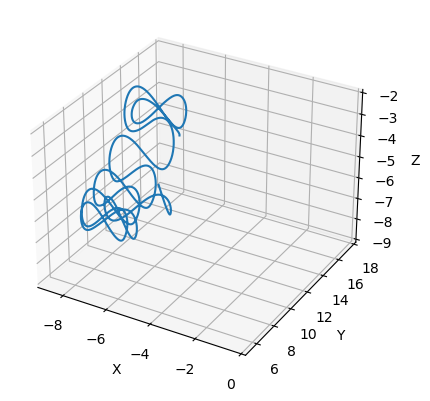

In [139]:
fig = plt.figure()
ax = plt.axes(projection='3d')


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_xlim3d([-9, 0])
ax.set_ylim3d([5, 18])
ax.set_zlim3d([-9, -2])


ax.plot3D(pos_sindy11_dp[:,0],pos_sindy11_dp[:,1],pos_sindy11_dp[:,2])
plt.show()

In [140]:
pos_sindy11

array([[-0.97267974,  0.67420619,  1.62070337],
       [-0.97259341,  0.67421009,  1.62090415],
       [-0.97247193,  0.67421604,  1.62119976],
       ...,
       [-8.78586336, 17.15966332, -8.61398692],
       [-8.80207551, 17.17090006, -8.58697697],
       [ 0.        ,  0.        ,  0.        ]])

#### 12th Model(v)

In [141]:
dt = 0.02
stlsq_optimizer = ps.STLSQ(threshold=.3, alpha=.3)

library_functions = [
    
    lambda x : np.cos(x),
    lambda x,y : x*y,
    lambda x,y : np.sin(x)*np.sin(y),
    lambda x : np.sin(x),
    lambda x,y : np.sin(x*y),
    lambda x,y : np.exp(x)*np.sin(y),
    lambda x,y : np.exp(-x)*np.sin(y),
    lambda x,y : np.sin(2*np.arctan(y/x))
]
library_function_names = [
    
    lambda x : '*np.cos(' + x + ')',
    lambda x,y : '*' + x + '*' + y,
    lambda x,y : '*' + 'np.sin(' + x + ')*np.sin(' + y + ')',
    lambda x : '*' + 'np.sin' +'(' + x + ')',
    lambda x,y : '*' + 'np.sin' + '(' + x + '*' + y + ')' ,
    lambda x,y : '*np.exp(' + x + ')' + '*np.sin(' + y + ')',
    lambda x,y : '*np.exp(' + '-' + x + ')' + '*np.sin(' + y + ')',
    lambda x,y : '*np.sin(2*np.arctan(' + y + '/' + x + '))'
]
custom_library = ps.CustomLibrary(
    library_functions=library_functions, function_names=library_function_names
)

model = ps.SINDy(feature_library=custom_library, optimizer=stlsq_optimizer)
model.fit(v, u=Rfu, t=dt)
model.print()

(x0)' = -194.322 *np.cos(x1) + 139.361 *np.cos(u0) + 54.699 *np.cos(u1) + -6.446 *x0*u2 + -657.708 *u0*u2 + -657.323 *np.sin(u0)*np.sin(u2) + 1233.295 *np.sin(u0) + 5.441 *np.sin(x0*u2) + 1215.677 *np.sin(u0*u2) + -569.850 *np.exp(x1)*np.sin(u0) + 1.338 *np.exp(x2)*np.sin(u0) + -1.715 *np.exp(u0)*np.sin(u2) + -2.148 *np.exp(-x0)*np.sin(u0) + -565.250 *np.exp(-x1)*np.sin(u0) + -1.142 *np.exp(-x1)*np.sin(u2) + -0.434 *np.sin(2*np.arctan(u2/x1)) + -7.184 *np.sin(2*np.arctan(u2/u0)) + 1.439 *np.sin(2*np.arctan(u2/u1))
(x1)' = 0.346 *np.sin(2*np.arctan(u2/u1))
(x2)' = 5.222 *np.cos(x0) + 800.094 *np.cos(x1) + -588.411 *np.cos(u0) + -102.253 *np.cos(u1) + -112.336 *np.cos(u2) + -428.189 *x0*u0 + -617.329 *x2*u0 + -605.466 *np.sin(x0)*np.sin(u0) + -2.694 *np.sin(x2)*np.sin(u2) + 3088.947 *np.sin(u2) + 1559.433 *np.sin(x0*u0) + 599.673 *np.sin(x2*u0) + -261.619 *np.exp(x0)*np.sin(u0) + 3.159 *np.exp(x0)*np.sin(u2) + 1.158 *np.exp(x1)*np.sin(x2) + 873.944 *np.exp(x1)*np.sin(u2) + 8.904 *np.exp(

In [142]:
accel8 = np.zeros((2511,3),dtype = np.float64)
for ele in range(2511):
    accel8[ele][0] = -194.322 *np.cos(v[ele][1]) + 139.361 *np.cos(Rfu[ele][0]) + 54.699 *np.cos(Rfu[ele][1]) + -6.446 *v[ele][0]*Rfu[ele][2] + -657.708 *Rfu[ele][0]*Rfu[ele][2] + -657.323 *np.sin(Rfu[ele][0])*np.sin(Rfu[ele][2]) + 1233.295 *np.sin(Rfu[ele][0]) + 5.441 *np.sin(v[ele][0]*Rfu[ele][2]) + 1215.677 *np.sin(Rfu[ele][0]*Rfu[ele][2]) + -569.850 *np.exp(v[ele][1])*np.sin(Rfu[ele][0]) + 1.338 *np.exp(v[ele][2])*np.sin(Rfu[ele][0]) + -1.715 *np.exp(Rfu[ele][0])*np.sin(Rfu[ele][2]) + -2.148 *np.exp(-v[ele][0])*np.sin(Rfu[ele][0]) + -565.250 *np.exp(-v[ele][1])*np.sin(Rfu[ele][0]) + -1.142 *np.exp(-v[ele][1])*np.sin(Rfu[ele][2]) + -0.434 *np.sin(2*np.arctan(Rfu[ele][2]/v[ele][1])) + -7.184 *np.sin(2*np.arctan(Rfu[ele][2]/Rfu[ele][0])) + 1.439 *np.sin(2*np.arctan(Rfu[ele][2]/Rfu[ele][1]))
    
for ele in range(2511):
    accel8[ele][1] = 0.346 *np.sin(2*np.arctan(Rfu[ele][2]/Rfu[ele][1]))
    
for ele in range(2511):
    accel8[ele][2] = 5.222 *np.cos(v[ele][0]) + 800.094 *np.cos(v[ele][1]) + -588.411 *np.cos(Rfu[ele][0]) + -102.253 *np.cos(Rfu[ele][1]) + -112.336 *np.cos(Rfu[ele][2]) + -428.189 *v[ele][0]*Rfu[ele][0] + -617.329 *v[ele][2]*Rfu[ele][0] + -605.466 *np.sin(v[ele][0])*np.sin(Rfu[ele][0]) + -2.694 *np.sin(v[ele][2])*np.sin(Rfu[ele][2]) + 3088.947 *np.sin(Rfu[ele][2]) + 1559.433 *np.sin(v[ele][0]*Rfu[ele][0]) + 599.673 *np.sin(v[ele][2]*Rfu[ele][0]) + -261.619 *np.exp(v[ele][0])*np.sin(Rfu[ele][0]) + 3.159 *np.exp(v[ele][0])*np.sin(Rfu[ele][2]) + 1.158 *np.exp(v[ele][1])*np.sin(v[ele][2]) + 873.944 *np.exp(v[ele][1])*np.sin(Rfu[ele][2]) + 8.904 *np.exp(v[ele][2])*np.sin(Rfu[ele][0]) + -861.290 *np.exp(Rfu[ele][0])*np.sin(Rfu[ele][2]) + -1535.587 *np.exp(Rfu[ele][1])*np.sin(Rfu[ele][2]) + 252.093 *np.exp(-v[ele][0])*np.sin(Rfu[ele][0]) + 4.632 *np.exp(-v[ele][0])*np.sin(Rfu[ele][2]) + 870.309 *np.exp(-v[ele][1])*np.sin(Rfu[ele][2]) + -6.987 *np.exp(-v[ele][2])*np.sin(Rfu[ele][0]) + 0.205 *np.exp(-v[ele][2])*np.sin(Rfu[ele][2]) + -913.090 *np.exp(-Rfu[ele][0])*np.sin(Rfu[ele][2]) + -1564.174 *np.exp(-Rfu[ele][1])*np.sin(Rfu[ele][2]) + 0.077 *np.sin(2*np.arctan(Rfu[ele][2]/v[ele][1])) + 2.748 *np.sin(2*np.arctan(Rfu[ele][2]/Rfu[ele][1]))

In [143]:
def acc12(tk,yk):
    count = tk/0.02
    return accel8[int(count)]

In [144]:
vel12 = np.zeros((2511,3),dtype = np.float64)

dt = 0.02

velx = v[0][0]
for ele in range(2511):
    
    velx = velx + accel8[ele][0]*dt
    vel12[ele][0] = velx
vely = v[0][1]
for ele in range(2511):
    vely = vely + accel8[ele][1]*dt
    vel12[ele][1] = vely
    
velz = v[0][2]
for ele in range(2511):
    velz = velz + accel8[ele][2]*dt
    vel12[ele][2] = velz
    
vel12

array([[-0.04372607, -0.01659362, -0.02804855],
       [-0.04306549, -0.01650619, -0.02209568],
       [-0.04244377, -0.01640714, -0.01605444],
       ...,
       [-1.03431949,  0.59090342,  1.58960447],
       [-1.04010138,  0.59112509,  1.54925873],
       [-1.04899219,  0.59133749,  1.49091894]])

In [145]:
pos_sindy12 = np.zeros((2511,3),dtype = np.float64)
posx = pos[0][0]
posy = pos[0][1]
posz = pos[0][2]

for ele in range(2511):
    posx = posx + vel12[ele][0]*dt
    pos_sindy12[ele][0] = posx

for ele in range(2511):
    posy = posy + vel12[ele][1]*dt
    pos_sindy12[ele][1] = posy
    
for ele in range(2511):
    posz = posz + vel12[ele][2]*dt
    pos_sindy12[ele][2] = posz
    
pos_sindy12

array([[ -0.14685992,  -0.02515053,   2.1237616 ],
       [ -0.14772123,  -0.02548065,   2.12331968],
       [ -0.1485701 ,  -0.0258088 ,   2.1229986 ],
       ...,
       [-13.20486395,  14.27177589, -12.17804764],
       [-13.22566598,  14.28359839, -12.14706247],
       [-13.24664582,  14.29542514, -12.11724409]])

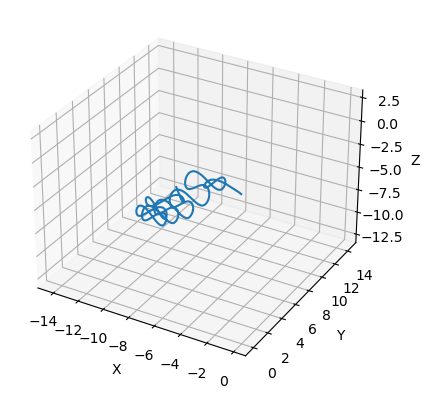

In [146]:
fig = plt.figure()
ax = plt.axes(projection='3d')


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')




ax.plot3D(pos_sindy12[:,0],pos_sindy12[:,1],pos_sindy12[:,2])
plt.show()

In [147]:
pos_sindy12

array([[ -0.14685992,  -0.02515053,   2.1237616 ],
       [ -0.14772123,  -0.02548065,   2.12331968],
       [ -0.1485701 ,  -0.0258088 ,   2.1229986 ],
       ...,
       [-13.20486395,  14.27177589, -12.17804764],
       [-13.22566598,  14.28359839, -12.14706247],
       [-13.24664582,  14.29542514, -12.11724409]])

In [148]:
accel9 = np.zeros((2511,3),dtype = np.float64)
for ele in range(2511):
    accel9[ele][0] = -0.338 *np.sin(v[ele][0]) + -2.240 *np.sin(v[ele][1]) + 21.511 *np.sin(Rfu[ele][0]) + -2.645 *np.sin(Rfu[ele][2])
    
for ele in range(2511):
    accel9[ele][1] = 1.661 *np.sin(Rfu[ele][1])
    
for ele in range(2511): 
    accel9[ele][2] = -22.619 *np.sin(v[ele][1]) + -1.947 *np.sin(Rfu[ele][0]) + -54.819 *np.sin(Rfu[ele][1]) + 2.009 *np.sin(Rfu[ele][2])
    

In [149]:
#vel = np.zeros((2511,1),dtype = np.float64)

#dt = 0.02

#velz = v[0][2]
#for ele in range(2511):
    
 #   velz = velz + az[ele][0]*dt
  #  vel[ele] = velz


In [150]:
pos_sindy13 = np.zeros((2511,1),dtype = np.float64)
pose = pos[0][2]


for ele in range(2511):
    pose = pose + vel[ele][0]*dt
    pos_sindy13[ele] = pose



In [151]:
vx = np.zeros((2511,1),dtype = np.float64)
for ele in range(2511):
    vx[ele] = v[ele][0]
    
vy = np.zeros((2511,1),dtype = np.float64)
for ele in range(2511):
    vy[ele] = v[ele][1]
    
vz = np.zeros((2511,1),dtype = np.float64)
for ele in range(2511):
    vz[ele] = v[ele][2]

#### 13th Model(v)

In [152]:
dt = 0.02
stlsq_optimizer = ps.STLSQ(threshold=.25, alpha=.3)

library_functions = [
    lambda x : np.cos(100*x),
    lambda x : np.exp(-np.square(x)/2)*np.cos(5*x),
    lambda x : np.cos(x),
    lambda x : np.cos(2*x),
    lambda x : np.cos(10*x),
    lambda x : np.cos(20*x),
    lambda x : np.cos(30*x),
    lambda x : np.cos(40*x),
    lambda x : np.cos(50*x),
    lambda x,y : np.sin(x)*np.sin(y),
    lambda x,y : np.sin(2*x)*np.sin(2*y),
    lambda x,y : np.sin(10*x)*np.sin(10*y),
    lambda x,y : np.sin(20*x)*np.sin(20*y),
    lambda x,y : np.sin(30*x)*np.sin(30*y),
    lambda x,y : np.sin(40*x)*np.sin(40*y),
    lambda x,y : np.sin(50*x)*np.sin(50*y),
    lambda x : np.sin(x),
    lambda x : np.sin(2*x),
    lambda x : np.sin(10*x),
    lambda x : np.sin(20*x),
    lambda x : np.sin(30*x),
    lambda x : np.sin(40*x),
    lambda x : np.sin(50*x),
    lambda x,y : np.sin(x*y),
    lambda x,y : np.sin(2*x*y),
    lambda x,y : np.sin(10*x*y),
    lambda x,y : np.sin(20*x*y),
    lambda x,y : np.sin(30*x*y),
    lambda x,y : np.sin(40*x*y),
    lambda x,y : np.sin(50*x*y)
]
library_function_names = [
    
    lambda x : '*np.cos(' +'100*' + x + ')',
    lambda x : 'np.exp(-np.square(' + x + ')/2)*np.cos(5* ' + x + ')',
    lambda x : '*np.cos(' + x + ')',
    lambda x : '*np.cos(' +'2*' + x + ')',
    lambda x : '*np.cos(' +'10*' + x + ')',
    lambda x : '*np.cos(' +'20*' + x + ')',
    lambda x : '*np.cos(' +'30*' + x + ')',
    lambda x : '*np.cos(' +'40*' + x + ')',
    lambda x : '*np.cos(' +'50*' + x + ')',
    lambda x,y : '*' + 'np.sin(' + x + ')*np.sin(' + y + ')',
    lambda x,y : '*' + 'np.sin(' + '2*' + x + ')*np.sin(' + '2*' + y + ')',
    lambda x,y : '*' + 'np.sin(' + '10*' + x + ')*np.sin(' + '10*' + y + ')',
    lambda x,y : '*' + 'np.sin(' + '20*' + x + ')*np.sin(' + '20*' + y + ')',
    lambda x,y : '*' + 'np.sin(' + '30*' + x + ')*np.sin(' + '30*' + y + ')',
    lambda x,y : '*' + 'np.sin(' + '40*' + x + ')*np.sin(' + '40*' + y + ')',
    lambda x,y : '*' + 'np.sin(' + '50*' + x + ')*np.sin(' + '50*' + y + ')',
    lambda x : '*' + 'np.sin' +'(' + x + ')',
    lambda x : '*' + 'np.sin' +'(' + '2*' + x + ')',
    lambda x : '*' + 'np.sin' +'(' + '10*' + x + ')',
    lambda x : '*' + 'np.sin' +'(' + '20*' + x + ')',
    lambda x : '*' + 'np.sin' +'(' + '30*' + x + ')',
    lambda x : '*' + 'np.sin' +'(' + '40*' + x + ')',
    lambda x : '*' + 'np.sin' +'(' + '50*' + x + ')',
    lambda x,y : '*' + 'np.sin' + '(' + x + '*' + y + ')' ,
    lambda x,y : '*' + 'np.sin' + '(' + '2*' + x + '*' + y + ')',
    lambda x,y : '*' + 'np.sin' + '(' + '10*' + x + '*' + y + ')',
    lambda x,y : '*' + 'np.sin' + '(' + '20*' + x + '*' + y + ')',
    lambda x,y : '*' + 'np.sin' + '(' + '30*' + x + '*' + y + ')',
    lambda x,y : '*' + 'np.sin' + '(' + '40*' + x + '*' + y + ')',
    lambda x,y : '*' + 'np.sin' + '(' + '50*' + x + '*' + y + ')',
]
custom_library = ps.CustomLibrary(
    library_functions=library_functions, function_names=library_function_names
)

model = ps.SINDy(feature_library=custom_library, optimizer=stlsq_optimizer)
model.fit(vx, u=Rfu, t=dt)
model.print()

(x0)' = -0.778 *np.cos(20*u0) + -0.582 *np.cos(30*u0) + 0.345 *np.sin(2*x0)*np.sin(2*u2) + -0.628 *np.sin(x0) + 0.382 *np.sin(50*u0) + 0.358 *np.sin(30*u0*u2)


In [153]:
ax = np.zeros((2511,1),dtype = np.float64)
for ele in range(2511):
    ax[ele] = -0.778 *np.cos(20*Rfu[ele][0]) + -0.582 *np.cos(30*Rfu[ele][0]) + 0.345 *np.sin(2*v[ele][0])*np.sin(2*Rfu[ele][2]) + -0.628 *np.sin(v[ele][0]) + 0.382 *np.sin(50*Rfu[ele][0]) + 0.358 *np.sin(30*Rfu[ele][0]*Rfu[ele][2])


In [154]:
def accx(tk,yk):
    count = tk/0.02
    
    return ax[int(count)]

In [155]:
velx = np.zeros((2511,1),dtype = np.float64)
yk = vx[0]
dt = 0.02
tk = 0
for ele in range(2510):
    ykplus1 = rk4(accx,tk,yk,dt)
    velx[ele] = ykplus1
    tk = tk+0.02
    yk = ykplus1 

In [156]:
def velocityx(tk,yk):
    count = tk/0.02
    return velx[int(count)]

In [157]:
pos_sindyx = np.zeros((2511,1),dtype = np.float64)
xk = pos[0][0]
dt = 0.02
tk = 0
for ele in range(2510):
    ykplus1 = rk4(velocityx,tk,yk,dt)
    pos_sindyx[ele] = ykplus1
    tk = tk+0.02
    yk = ykplus1

In [158]:
pos_sindyx[2510] = pos_sindyx[2509]

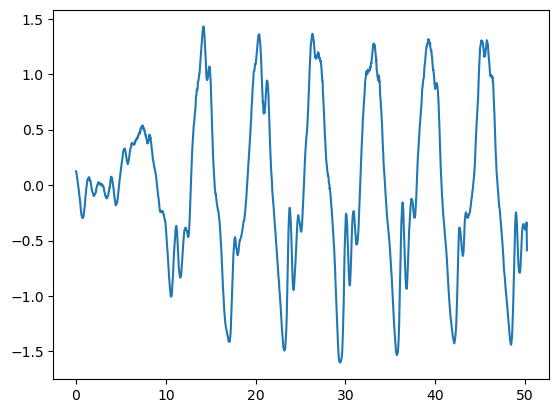

In [159]:
fig = plt.figure()
plt.plot(t, ax)
plt.show()

In [160]:
posx = np.zeros((2511,1),dtype = np.float64)
for ele in range(2511):
    posx[ele] = pos[ele][0]
    
posy = np.zeros((2511,1),dtype = np.float64)
for ele in range(2511):
    posy[ele] = pos[ele][1]
    
posz = np.zeros((2511,1),dtype = np.float64)
for ele in range(2511):
    posz[ele] = pos[ele][2]

In [161]:
accx = np.zeros((2511,1),dtype = np.float64)
for ele in range(2510):
    accx[ele] = (vx[ele+1]-vx[ele])/0.02

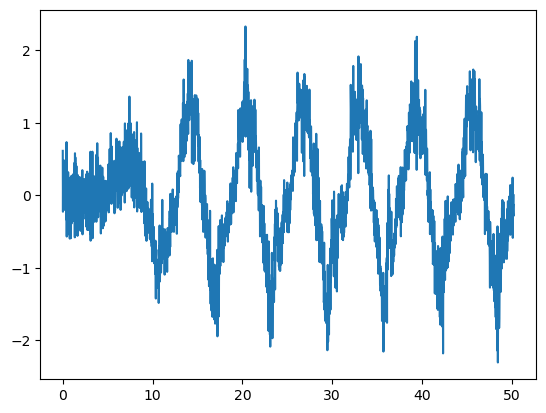

In [162]:
fig = plt.figure()
plt.plot(t, accx)
plt.show()

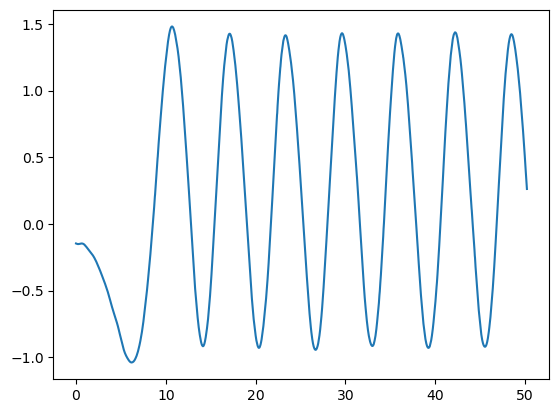

In [163]:
fig = plt.figure()
plt.plot(t, posx)
plt.show()

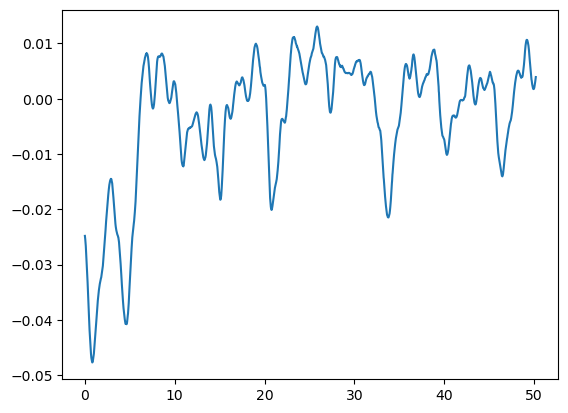

In [164]:
fig = plt.figure()
plt.plot(t, posy)
plt.show()

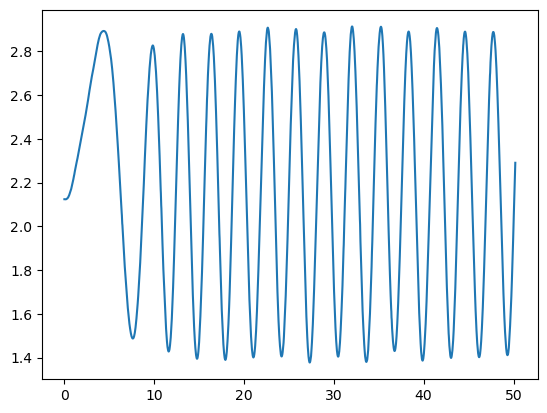

In [165]:
fig = plt.figure()
plt.plot(t, posz)
plt.show()

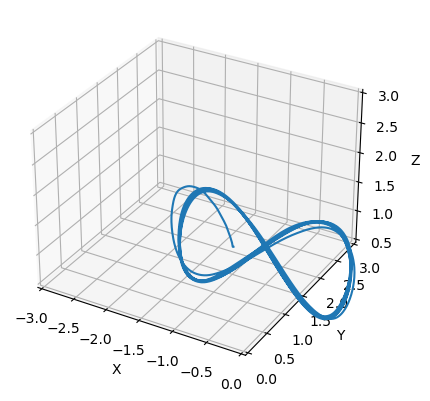

In [166]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.set_xlim3d([-3, 0])
ax.set_ylim3d([0, 3])
ax.set_zlim3d([0.5, 3])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.plot3D(pos[:,0],pos[:,1],pos[:,2])
plt.show()

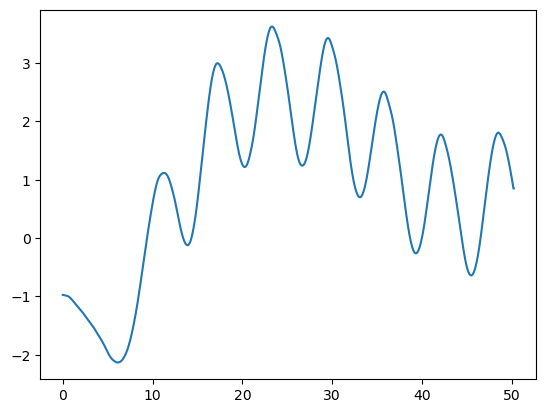

In [167]:
fig = plt.figure()
plt.plot(t, pos_sindyx)
plt.show()

#### 14th Model(v)

In [168]:
dt = 0.02
stlsq_optimizer = ps.STLSQ(threshold=.1, alpha=.3)

library_functions = [
    
    lambda x : np.sin(x),
    lambda x : np.cos(x),
    lambda x : np.sin(2*x),
    lambda x : np.cos(2*x),
    lambda x : np.sin(3*x),
    lambda x : np.cos(3*x),
    lambda x : np.exp(-np.square(x)),
    lambda x : np.exp(np.square(x))
    
    
]
library_function_names = [
    
    
    
    lambda x : '*np.sin(' + x + ')',
    lambda x : '*np.cos(' + x + ')',
    lambda x : '*np.sin( 2* ' + x + ')',
    lambda x : '*np.cos( 2* ' + x + ')',
    lambda x : '*np.sin( 3* ' + x + ')',
    lambda x : '*np.cos( 3* ' + x + ')',
    lambda x : '*np.exp(-np.square(' + x + '))',
    lambda x : '*np.exp(np.square(' + x + '))'
    
    
    
]
custom_library = ps.CustomLibrary(
    library_functions=library_functions, function_names=library_function_names
)

model = ps.SINDy(feature_library=custom_library, optimizer=stlsq_optimizer)
model.fit(vz, u=Rfu, t=dt)
model.print()

(x0)' = -0.283 *np.sin(x0) + -23812123564.730 *np.sin(u1) + 292209210.821 *np.sin(u2) + 0.187 *np.cos(x0) + -1163979.979 *np.cos(u0) + -204051796105.556 *np.cos(u1) + -1910006902.136 *np.cos(u2) + 19049338933.849 *np.sin( 2* u1) + -224525145.525 *np.sin( 2* u2) + 394093899035.558 *np.cos( 2* u1) + 248925210.111 *np.cos( 2* u2) + 4.680 *np.sin( 3* u0) + -4762184770.469 *np.sin( 3* u1) + 52432481.661 *np.sin( 3* u2) + 62146.674 *np.cos( 3* u0) + -55407498337.909 *np.cos( 3* u1) + -270623852.418 *np.cos( 3* u2) + -285555840982.044 *np.exp(-np.square(u1)) + 1630234396.305 *np.exp(-np.square(u2)) + -302555.199 *np.exp(np.square(u0)) + 151272318655.279 *np.exp(np.square(u1)) + -48231865.846 *np.exp(np.square(u2))


In [169]:
az = np.zeros((2511,1),dtype = np.float64)
for ele in range(2511):
    az[ele] = -0.283 *np.sin(v[ele][0]) + -23812123564.730 *np.sin(Rfu[ele][1]) + 292209210.821 *np.sin(Rfu[ele][2]) + 0.187 *np.cos(v[ele][0]) + -1163979.979 *np.cos(Rfu[ele][0]) + -204051796105.556 *np.cos(Rfu[ele][1]) + -1910006902.136 *np.cos(Rfu[ele][2]) + 19049338933.849 *np.sin( 2* Rfu[ele][1]) + -224525145.525 *np.sin( 2* Rfu[ele][2]) + 394093899035.558 *np.cos( 2* Rfu[ele][1]) + 248925210.111 *np.cos( 2* Rfu[ele][2]) + 4.680 *np.sin( 3* Rfu[ele][0]) + -4762184770.469 *np.sin( 3* Rfu[ele][1]) + 52432481.661 *np.sin( 3* Rfu[ele][2]) + 62146.674 *np.cos( 3* Rfu[ele][0]) + -55407498337.909 *np.cos( 3* Rfu[ele][1]) + -270623852.418 *np.cos( 3* Rfu[ele][2]) + -285555840982.044 *np.exp(-np.square(Rfu[ele][1])) + 1630234396.305 *np.exp(-np.square(Rfu[ele][2])) + -302555.199 *np.exp(np.square(Rfu[ele][0])) + 151272318655.279 *np.exp(np.square(Rfu[ele][1])) + -48231865.846 *np.exp(np.square(Rfu[ele][2]))



In [170]:
def accz2(tk,yk):
    count = tk/0.02
    
    return az[int(count)]

In [171]:
velz = np.zeros((2511,1),dtype = np.float64)
yk = 0
dt = 0.02
tk = 0
for ele in range(2510):
    ykplus1 = rk4(accz2,tk,yk,dt)
    velz[ele] = ykplus1
    tk = tk+0.02
    yk = ykplus1 

In [172]:
def velocityz(tk,yk):
    count = tk/0.02
    return velz[int(count)]

In [173]:
pos_sindyz = np.zeros((2511,1),dtype = np.float64)
xk = pos[0][2]
dt = 0.02
tk = 0
for ele in range(2510):
    ykplus1 = rk4(velocityz,tk,yk,dt)
    pos_sindyz[ele] = ykplus1
    tk = tk+0.02
    yk = ykplus1

In [174]:
pos_sindyz[2510] = pos_sindyz[2509]

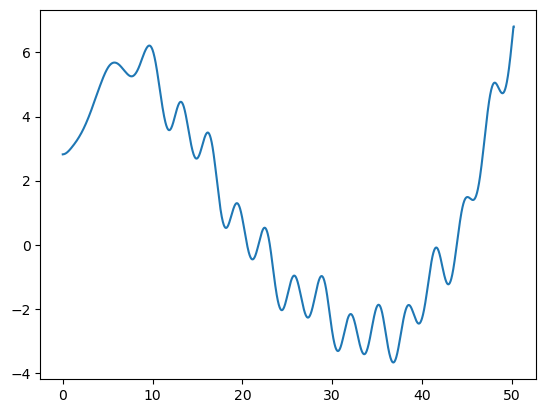

In [175]:
fig = plt.figure()
plt.plot(t, pos_sindyz)
plt.show()

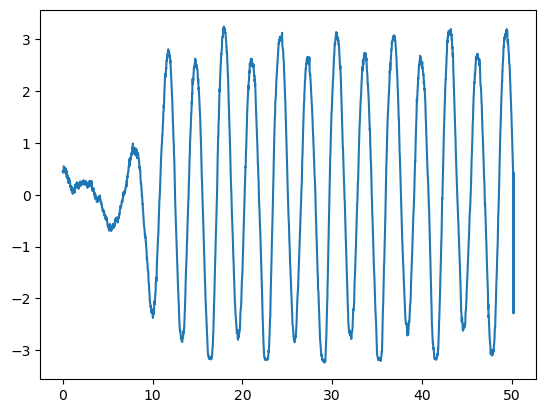

In [176]:
fig = plt.figure()
plt.plot(t, az)
plt.show()

In [177]:
accz = np.zeros((2511,1),dtype = np.float64)
for ele in range(2510):
    accz[ele] = (vz[ele+1]-vz[ele])/0.02

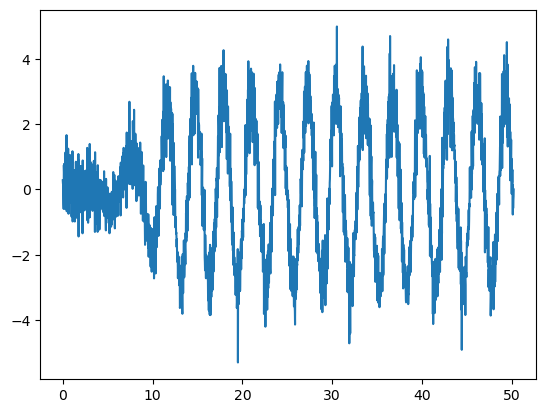

In [178]:
fig = plt.figure()
plt.plot(t, accz)
plt.show()

In [179]:
accy = np.zeros((2511,1),dtype = np.float64)
for ele in range(2510):
    accy[ele] = (vy[ele+1]-vy[ele])/0.02
    


In [180]:
dt = 0.02
stlsq_optimizer = ps.STLSQ(threshold=.1, alpha=.2)

library_functions = [
    lambda x,y : x*y,
    lambda x : np.cos(5*x),

    lambda x : np.cos(10*x),
    lambda x : np.exp(x),
    lambda x : np.exp(-x),
    lambda x : np.exp(2*x),
    lambda x : np.exp(-2*x),
    lambda x : np.exp(5*x),
    lambda x : np.exp(-5*x)
    
]
library_function_names = [
    lambda x,y : '*' + x + '*' + y,
    lambda x : '*np.cos(5*' + x + ')',
  
    lambda x : '*np.cos(10*' + x + ')',
    lambda x : '*np.exp(' + x + ')',
    lambda x : '*np.exp( -' + x + ')',
    lambda x : '*np.exp( 2*' + x + ')',
    lambda x : '*np.exp( -2*' + x + ')',
    lambda x : '*np.exp( 5*' + x + ')',
    lambda x : '*np.exp( -5*' + x + ')'

]
custom_library = ps.CustomLibrary(
    library_functions=library_functions, function_names=library_function_names
)

model = ps.SINDy(feature_library=custom_library, optimizer=stlsq_optimizer)
model.fit(vy, u=Rfu, t=dt)
model.print()

(x0)' = 82256857.174 *np.cos(10*u1) + 547586115.421 *np.exp(u1) + -15473743384.280 *np.exp( -u1) + 3706739070.873 *np.exp( 2*u1) + 12862103030.464 *np.exp( -2*u1) + -633531001.600 *np.exp( 5*u1) + -1091410688.123 *np.exp( -5*u1)


In [181]:
ay = np.zeros((2511,1),dtype = np.float64)
for ele in range(2511):
    ay[ele] = 82256857.174 *np.cos(10*Rfu[ele][1]) + 547586115.421 *np.exp(Rfu[ele][1]) + -15473743384.280 *np.exp( -Rfu[ele][1]) + 3706739070.873 *np.exp( 2*Rfu[ele][1]) + 12862103030.464 *np.exp( -2*Rfu[ele][1]) + -633531001.600 *np.exp( 5*Rfu[ele][1]) + -1091410688.123 *np.exp( -5*Rfu[ele][1])

In [182]:
def accy2(tk,yk):
    count = tk/0.02
    
    return ay[int(count)]

In [183]:
vely = np.zeros((2511,1),dtype = np.float64)
yk = vy[0]
dt = 0.02
tk = 0
for ele in range(2510):
    ykplus1 = rk4(accy2,tk,yk,dt)
    vely[ele] = ykplus1
    tk = tk+0.02
    yk = ykplus1 

In [184]:
def velocityy(tk,yk):
    count = tk/0.02
    return vely[int(count)]

In [185]:
pos_sindyy = np.zeros((2511,1),dtype = np.float64)
xk = pos[0][1]
dt = 0.02
tk = 0
for ele in range(2510):
    ykplus1 = rk4(velocityy,tk,yk,dt)
    pos_sindyy[ele] = ykplus1
    tk = tk+0.02
    yk = ykplus1

In [186]:
pos_sindyy[2510] = pos_sindyy[2509]

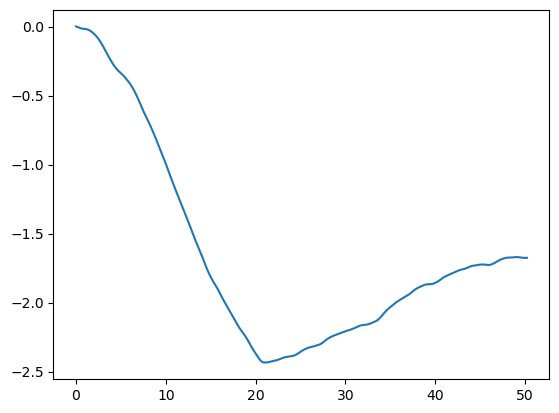

In [187]:
fig = plt.figure()
plt.plot(t, pos_sindyy)
plt.show()

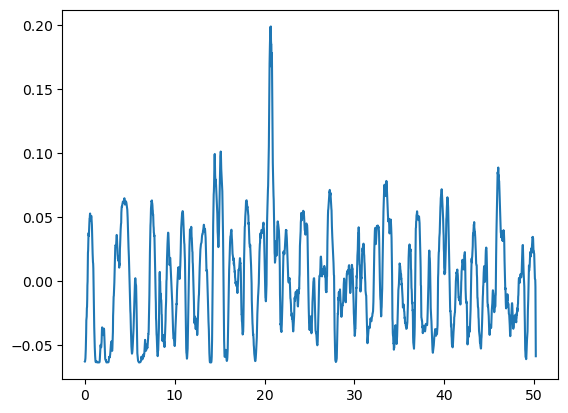

In [188]:
fig = plt.figure()
plt.plot(t, ay)
plt.show()

In [189]:
pos_sindyf = np.zeros((2511,3),dtype = np.float64)
for ele in range(2511):
    pos_sindyf[ele][0] = pos_sindyx[ele]
for ele in range(2511):
    pos_sindyf[ele][1] = pos_sindyy[ele]
for ele in range(2511):
    pos_sindyf[ele][2] = pos_sindyz[ele]

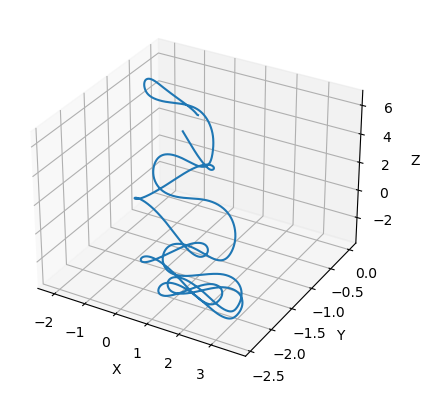

In [190]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.plot3D(pos_sindyf[:,0],pos_sindyf[:,1],pos_sindyf[:,2])
plt.show()

In [191]:
#mse
#errorx = 0.0
#for ele in range(2511):
#    temp = np.square(np.subtract(ax[ele],accx[ele]))
#    errorx = errorx + temp
#errorx = errorx/2511
#errorx

In [192]:
#mse
errory = 0.0
for ele in range(2511):
    temp = np.square(np.subtract(pos_sindyy[ele],posy[ele]))
    errory = errory + temp
errory = errory/2511
errory

array([3.2229752])

In [193]:
#mse
errorz = 0.0
for ele in range(2511):
    temp = np.square(np.subtract(pos_sindyz[ele],posz[ele]))
    errorz = errorz + temp
errorz = errorz/2511
errorz

array([10.09106972])

# 70psin20t

#### Model1

In [195]:
dt = 0.02
stlsq_optimizer = ps.STLSQ(threshold=.1, alpha=.2)

library_functions = [
    lambda x,y : x*y,
    lambda x : np.cos(5*x),

    lambda x : np.cos(10*x),
    lambda x : np.exp(x),
    lambda x : np.exp(-x),
    lambda x : np.exp(2*x),
    lambda x : np.exp(-2*x),
    lambda x : np.exp(5*x),
    lambda x : np.exp(-5*x)
    
]
library_function_names = [
    lambda x,y : '*' + x + '*' + y,
    lambda x : '*np.cos(5*' + x + ')',
  
    lambda x : '*np.cos(10*' + x + ')',
    lambda x : '*np.exp(' + x + ')',
    lambda x : '*np.exp( -' + x + ')',
    lambda x : '*np.exp( 2*' + x + ')',
    lambda x : '*np.exp( -2*' + x + ')',
    lambda x : '*np.exp( 5*' + x + ')',
    lambda x : '*np.exp( -5*' + x + ')'

]
custom_library = ps.CustomLibrary(
    library_functions=library_functions, function_names=library_function_names
)

model = ps.SINDy(feature_library=custom_library, optimizer=stlsq_optimizer)
model.fit(v2, u=Rfu2, t=dt)
model.print()

(x0)' = 0.270 *x0*x2 + 0.935 *x0*u0 + -1.088 *x0*u2 + 0.685 *x1*x2 + 11.025 *x1*u0 + 16.198 *x1*u2 + -3.161 *x2*u0 + 1.506 *x2*u1 + 2.522 *u0*u2 + -489203.360 *np.cos(5*x1) + 1032769.136 *np.cos(5*u0) + 3.924 *np.cos(5*u2) + 14303.375 *np.cos(10*x1) + -11883.552 *np.cos(10*u0) + 5971.555 *np.exp(x1) + 0.189 *np.exp(x2) + 176173143.766 *np.exp(u0) + -362366738.844 *np.exp(u1) + -0.091 *np.exp( -x2) + 180186018.908 *np.exp( -u0) + 63.311 *np.exp( -u2) + -2579789.436 *np.exp( 2*x1) + -43033022.788 *np.exp( 2*u0) + 153096363.806 *np.exp( 2*u1) + -2576339.003 *np.exp( -2*x1) + -45335226.599 *np.exp( -2*u0) + -54022360.874 *np.exp( -2*u1) + -67.140 *np.exp( -2*u2) + 196468.745 *np.exp( 5*x1) + 375895.828 *np.exp( 5*u0) + -5865519.574 *np.exp( 5*u1) + 196285.260 *np.exp( -5*x1) + 494225.062 *np.exp( -5*u0) + 4508627.738 *np.exp( -5*u1)
(x1)' = -0.698 *x0*u1 + -0.743 *x1*x2 + 1750434.324 *np.cos(10*u1) + 99325801.800 *np.exp(u1) + -418496813.077 *np.exp( -u1) + 29217967.579 *np.exp( 2*u1) + 32

In [196]:
acceln = np.zeros((2511,3),dtype = np.float64)

In [197]:
acceln = np.zeros((2511,3),dtype = np.float64)
for ele in range(2511):
    acceln[ele][0] = 0.270 *v2[ele][0]*v2[ele][2] + 0.935 *v2[ele][0]*Rfu2[ele][0] + -1.088 *v2[ele][0]*Rfu2[ele][2] + 0.685 *v2[ele][1]*v2[ele][2] + 11.025 *v2[ele][1]*Rfu2[ele][0] + 16.198 *v2[ele][1]*Rfu2[ele][2] + -3.161 *v2[ele][2]*Rfu2[ele][0] + 1.506 *v2[ele][2]*Rfu2[ele][1] + 2.522 *Rfu2[ele][0]*Rfu2[ele][2] + -489203.360 *np.cos(5*v2[ele][1]) + 1032769.136 *np.cos(5*Rfu2[ele][0]) + 3.924 *np.cos(5*Rfu2[ele][2]) + 14303.375 *np.cos(10*v2[ele][1]) + -11883.552 *np.cos(10*Rfu2[ele][0]) + 5971.555 *np.exp(v2[ele][1]) + 0.189 *np.exp(v2[ele][2]) + 176173143.766 *np.exp(Rfu2[ele][0]) + -362366738.844 *np.exp(Rfu2[ele][1]) + -0.091 *np.exp( -v2[ele][2]) + 180186018.908 *np.exp( -Rfu2[ele][0]) + 63.311 *np.exp( -Rfu2[ele][2]) + -2579789.436 *np.exp( 2*v2[ele][1]) + -43033022.788 *np.exp( 2*Rfu2[ele][0]) + 153096363.806 *np.exp( 2*Rfu2[ele][1]) + -2576339.003 *np.exp( -2*v2[ele][1]) + -45335226.599 *np.exp( -2*Rfu2[ele][0]) + -54022360.874 *np.exp( -2*Rfu2[ele][1]) + -67.140 *np.exp( -2*Rfu2[ele][2]) + 196468.745 *np.exp( 5*v2[ele][1]) + 375895.828 *np.exp( 5*Rfu2[ele][0]) + -5865519.574 *np.exp( 5*Rfu2[ele][1]) + 196285.260 *np.exp( -5*v2[ele][1]) + 494225.062 *np.exp( -5*Rfu2[ele][0]) + 4508627.738 *np.exp( -5*Rfu2[ele][1])
    
for ele in range(2511):
    acceln[ele][1] = -0.698 *v2[ele][0]*Rfu2[ele][1] + -0.743 *v2[ele][1]*v2[ele][2] + 1750434.324 *np.cos(10*Rfu2[ele][1]) + 99325801.800 *np.exp(Rfu2[ele][1]) + -418496813.077 *np.exp( -Rfu2[ele][1]) + 29217967.579 *np.exp( 2*Rfu2[ele][1]) + 325129652.509 *np.exp( -2*Rfu2[ele][1]) + -11063444.821 *np.exp( 5*Rfu2[ele][1]) + -25863598.515 *np.exp( -5*Rfu2[ele][1])
    
for ele in range(2511):
    acceln[ele][2] = 1.047 *v2[ele][0]*Rfu2[ele][0] + -1.992 *v2[ele][2]*Rfu2[ele][0] + -0.533 *v2[ele][2]*Rfu2[ele][2] + 0.447 *np.cos(5*v2[ele][1]) + 0.554 *np.cos(5*Rfu2[ele][2]) + 0.503 *np.cos(10*Rfu2[ele][0]) + 8729.201 *np.cos(10*Rfu2[ele][1]) + 1.129 *np.cos(10*Rfu2[ele][2]) + -0.733 *np.exp(v2[ele][0]) + 0.230 *np.exp(v2[ele][2]) + -0.827 *np.exp( -v2[ele][0]) + -6449.582 *np.exp( 2*Rfu2[ele][1]) + -46028.401 *np.exp( -2*Rfu2[ele][1]) + -0.555 *np.exp( 5*v2[ele][1]) + -0.428 *np.exp( 5*Rfu2[ele][0]) + 13953.783 *np.exp( 5*Rfu2[ele][1]) + 0.268 *np.exp( 5*Rfu2[ele][2]) + -0.185 *np.exp( -5*Rfu2[ele][0]) + 29795.062 *np.exp( -5*Rfu2[ele][1])

In [198]:
vx2 = np.zeros((2511,1),dtype = np.float64)
for ele in range(2511):
    vx2[ele] = v2[ele][0]
    
vy2 = np.zeros((2511,1),dtype = np.float64)
for ele in range(2511):
    vy2[ele] = v2[ele][1]
    
vz2 = np.zeros((2511,1),dtype = np.float64)
for ele in range(2511):
    vz2[ele] = v2[ele][2]

In [199]:
accz2 = np.zeros((2511,1),dtype = np.float64)
for ele in range(2510):
    accz2[ele] = (vz2[ele+1]-vz2[ele])/0.02
    
accy2 = np.zeros((2511,1),dtype = np.float64)
for ele in range(2510):
    accy2[ele] = (vy2[ele+1]-vy2[ele])/0.02
    
accx2 = np.zeros((2511,1),dtype = np.float64)
for ele in range(2510):
    accx2[ele] = (vx2[ele+1]-vx2[ele])/0.02

In [200]:
errorx = 0.0
for ele in range(2510):
    temp = np.square(np.subtract(acceln[ele][0],accx2[ele]))
    errorx = errorx + temp
errorx = errorx/2510
print(errorx)

errory = 0.0
for ele in range(2510):
    temp = np.square(np.subtract(acceln[ele][1],accy2[ele]))
    errory = errory + temp
errory = errory/2510
print(errory)

errorz= 0.0
for ele in range(2510):
    temp = np.square(np.subtract(acceln[ele][2],accz2[ele]))
    errorz= errorz+ temp
errorz= errorz/2510
print(errorz)

[0.06211521]
[0.08453351]
[0.16175831]


In [201]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mae = mean_absolute_error(acc_v2, acceln)
mse = mean_squared_error(acc_v2, acceln)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)

Mean Absolute Error: 0.2382486882917266
Mean Squared Error: 0.10313768171538702


0.06218177471238505 0.08452523725526832 0.16270276558854752


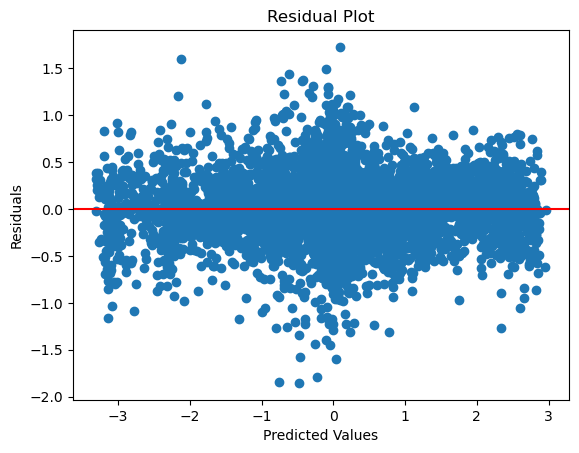

In [202]:
residuals = np.array(acc_v2) - np.array(acceln)
print(np.var(residuals[:,0]),np.var(residuals[:,1]),np.var(residuals[:,2]))# Plot the residuals against the predicted values
plt.scatter(acceln, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

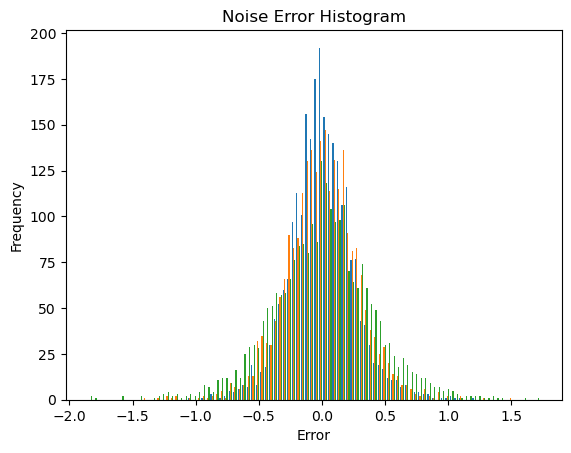

In [203]:
plt.hist(residuals, bins=100)
plt.title('Noise Error Histogram')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()